In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import math
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("fin_health.csv")

In [3]:
df.sample(10)

ID country  owner_age attitude_stable_business_environment  \
697   ID_BUYS9P       C         42                                  Yes   
239   ID_M8FHCC       C         33                    Don’t know or N/A   
4891  ID_VQ5GXQ       D         43                                   No   
4599  ID_Y90BWF       D         29                                  Yes   
6184  ID_Z21XG7       C         35                    Don’t know or N/A   
130   ID_26ASF3       D         38                                   No   
5257  ID_MNOXW2       D         21                                  Yes   
811   ID_RG4KW4       D         26                                  Yes   
2907  ID_7NIDP9       A         52                                  Yes   
3795  ID_2VHAK2       B         70                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
697                         No                    No   
239                        Yes                    No   
4891                       Yes                    No   
4599                        No                    No   
6184                       Yes                    No   
130                         No                    No   
5257                       Yes                    No   
811                         No                    No   
2907                       Yes                   Yes   
3795                        No                    No   

     perception_insurance_doesnt_cover_losses  \
697                                Don't know   
239                                       Yes   
4891                                      Yes   
4599                               Don't know   
6184                               Don't know   
130                                        No   
5257                                      Yes   
811                                       Yes   
2907                                       No   
3795                                       No   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
697                                 Yes         500000.0            20000.0   
239                                 Yes          50000.0            10000.0   
4891                                Yes            350.0             2400.0   
4599                                 No            150.0              600.0   
6184                                Yes        2000000.0         10000000.0   
130                                 Yes            300.0             1800.0   
5257                                Yes             20.0              360.0   
811                                 Yes            200.0             3600.0   
2907                                Yes           3600.0            28800.0   
3795                                Yes           1200.0             2790.0   

      ...  has_internet_banking  has_debit_card future_risk_theft_stock  \
697   ...             Never had        Have now                     Yes   
239   ...             Never had       Never had                      No   
4891  ...                   NaN             NaN                      No   
4599  ...                   NaN             NaN                      No   
6184  ...             Never had        Have now                     Yes   
130   ...                   NaN             NaN                     Yes   
5257  ...                   NaN             NaN                     Yes   
811   ...                   NaN             NaN                      No   
2907  ...             Never had       Never had                     NaN   
3795  ...                   NaN             NaN                     NaN   

     business_age_months medical_insurance funeral_insurance  \
697                  NaN               NaN               NaN   
239                  NaN               NaN               NaN   
4891                 0.0          Have now          Have now   
4599                 0.0         Never had         Never had   
6184          

In [4]:
df.duplicated().value_counts()

False    9618
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   int64  
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-null   object 
 7   perception_cannot_afford_insuranc

In [6]:
X = df.drop(columns=['ID', 'Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [7]:
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

In [8]:
desc = X_train.describe()
desc = desc.applymap(lambda x: f"{x:.2f}")
desc

owner_age personal_income business_expenses business_turnover  \
count   7694.00         7604.00           7509.00           7520.00   
mean      41.72       258615.58         474755.45        1342567.70   
std       13.35      2610632.90        6821195.97        9014633.51   
min       18.00            0.00              0.00              0.00   
25%       32.00          300.00            650.00           1500.00   
50%       40.00         2000.00           3000.00           6000.00   
75%       50.00        25000.00          25000.00          50000.00   
max      103.00    150000000.00      500000000.00      420000000.00   

      business_age_years business_age_months  
count            7491.00             4410.00  
mean                7.07                3.59  
std                 7.70                3.36  
min                 0.00                0.00  
25%                 2.00                0.00  
50%                 4.00                3.00  
75%                10.00                6.00  
max                60.00               11.00

<mark>Full of potential outliers</mark>

#### Examine the Distribution of the Target Column

Target
Low       5024
Medium    2294
High       376
Name: count, dtype: int64


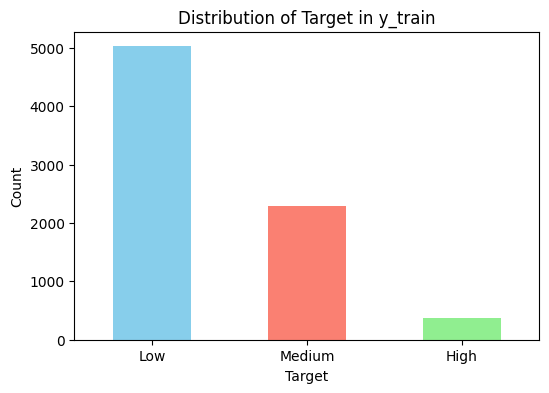

In [9]:

# Count occurrences of each category
target_counts = y_train.value_counts()
print(target_counts)
# Plot
plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Target in y_train')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


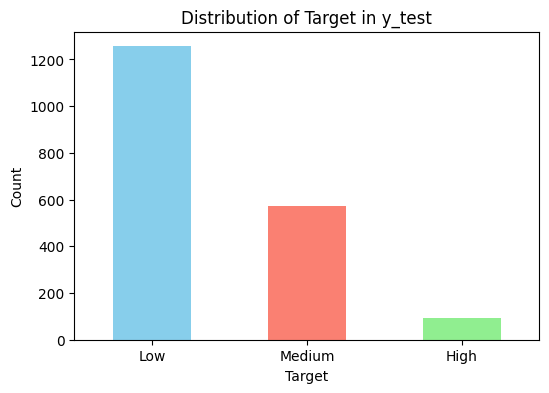

In [54]:

# Count occurrences of each category
target_counts = y_test.value_counts()

# Plot
plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Target in y_test')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### Examine Missing Values

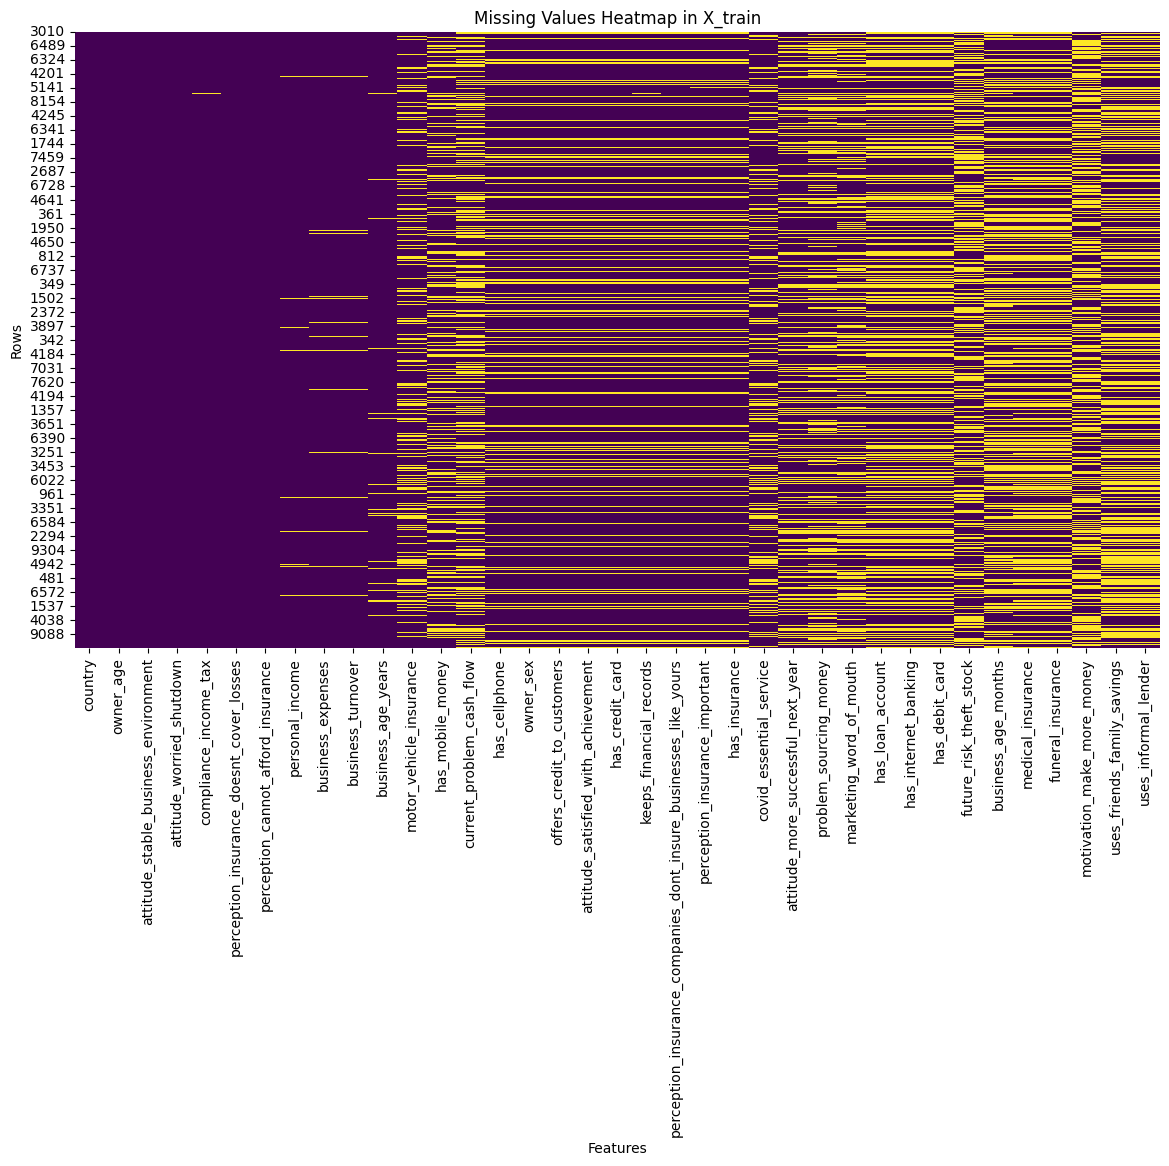

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap in X_train")
plt.xlabel("Features")
plt.ylabel("Rows")
plt.show()


<Figure size 1400x600 with 0 Axes>

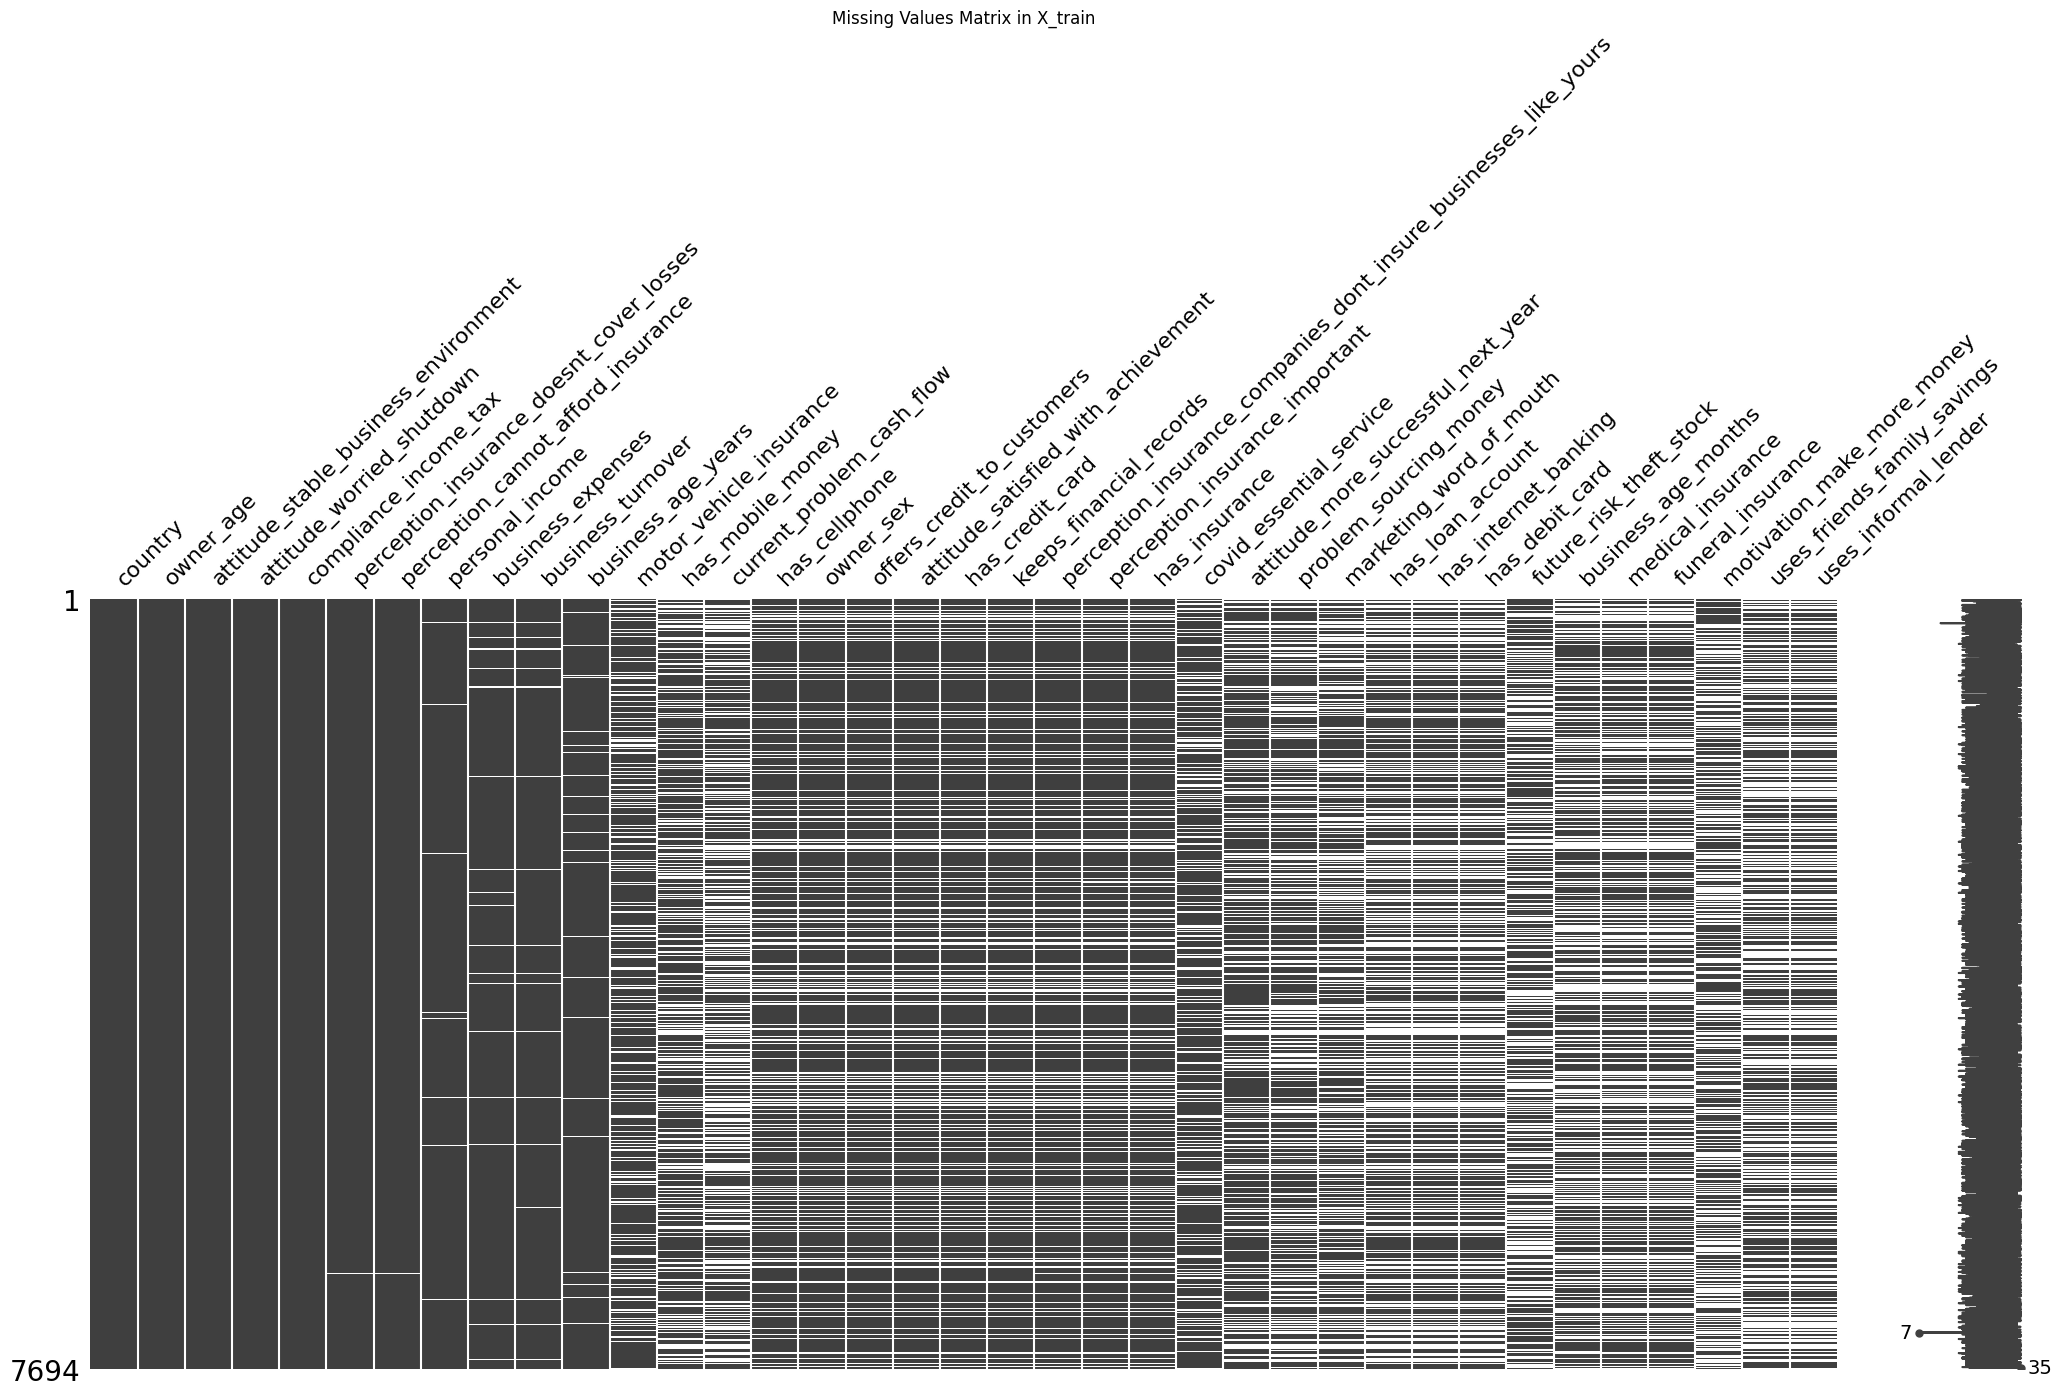

In [38]:
import missingno as msno

# Plot missing value matrix for X_train
plt.figure(figsize=(14,6))
msno.matrix(X_train)
plt.title("Missing Values Matrix in X_train")
plt.show()


<mark>Rows with many missing values: consider dropping if they contain critical gaps.</mark>
- Patterns of missingness: can indicate systematic missing data, e.g., certain types of businesses not reporting some features.

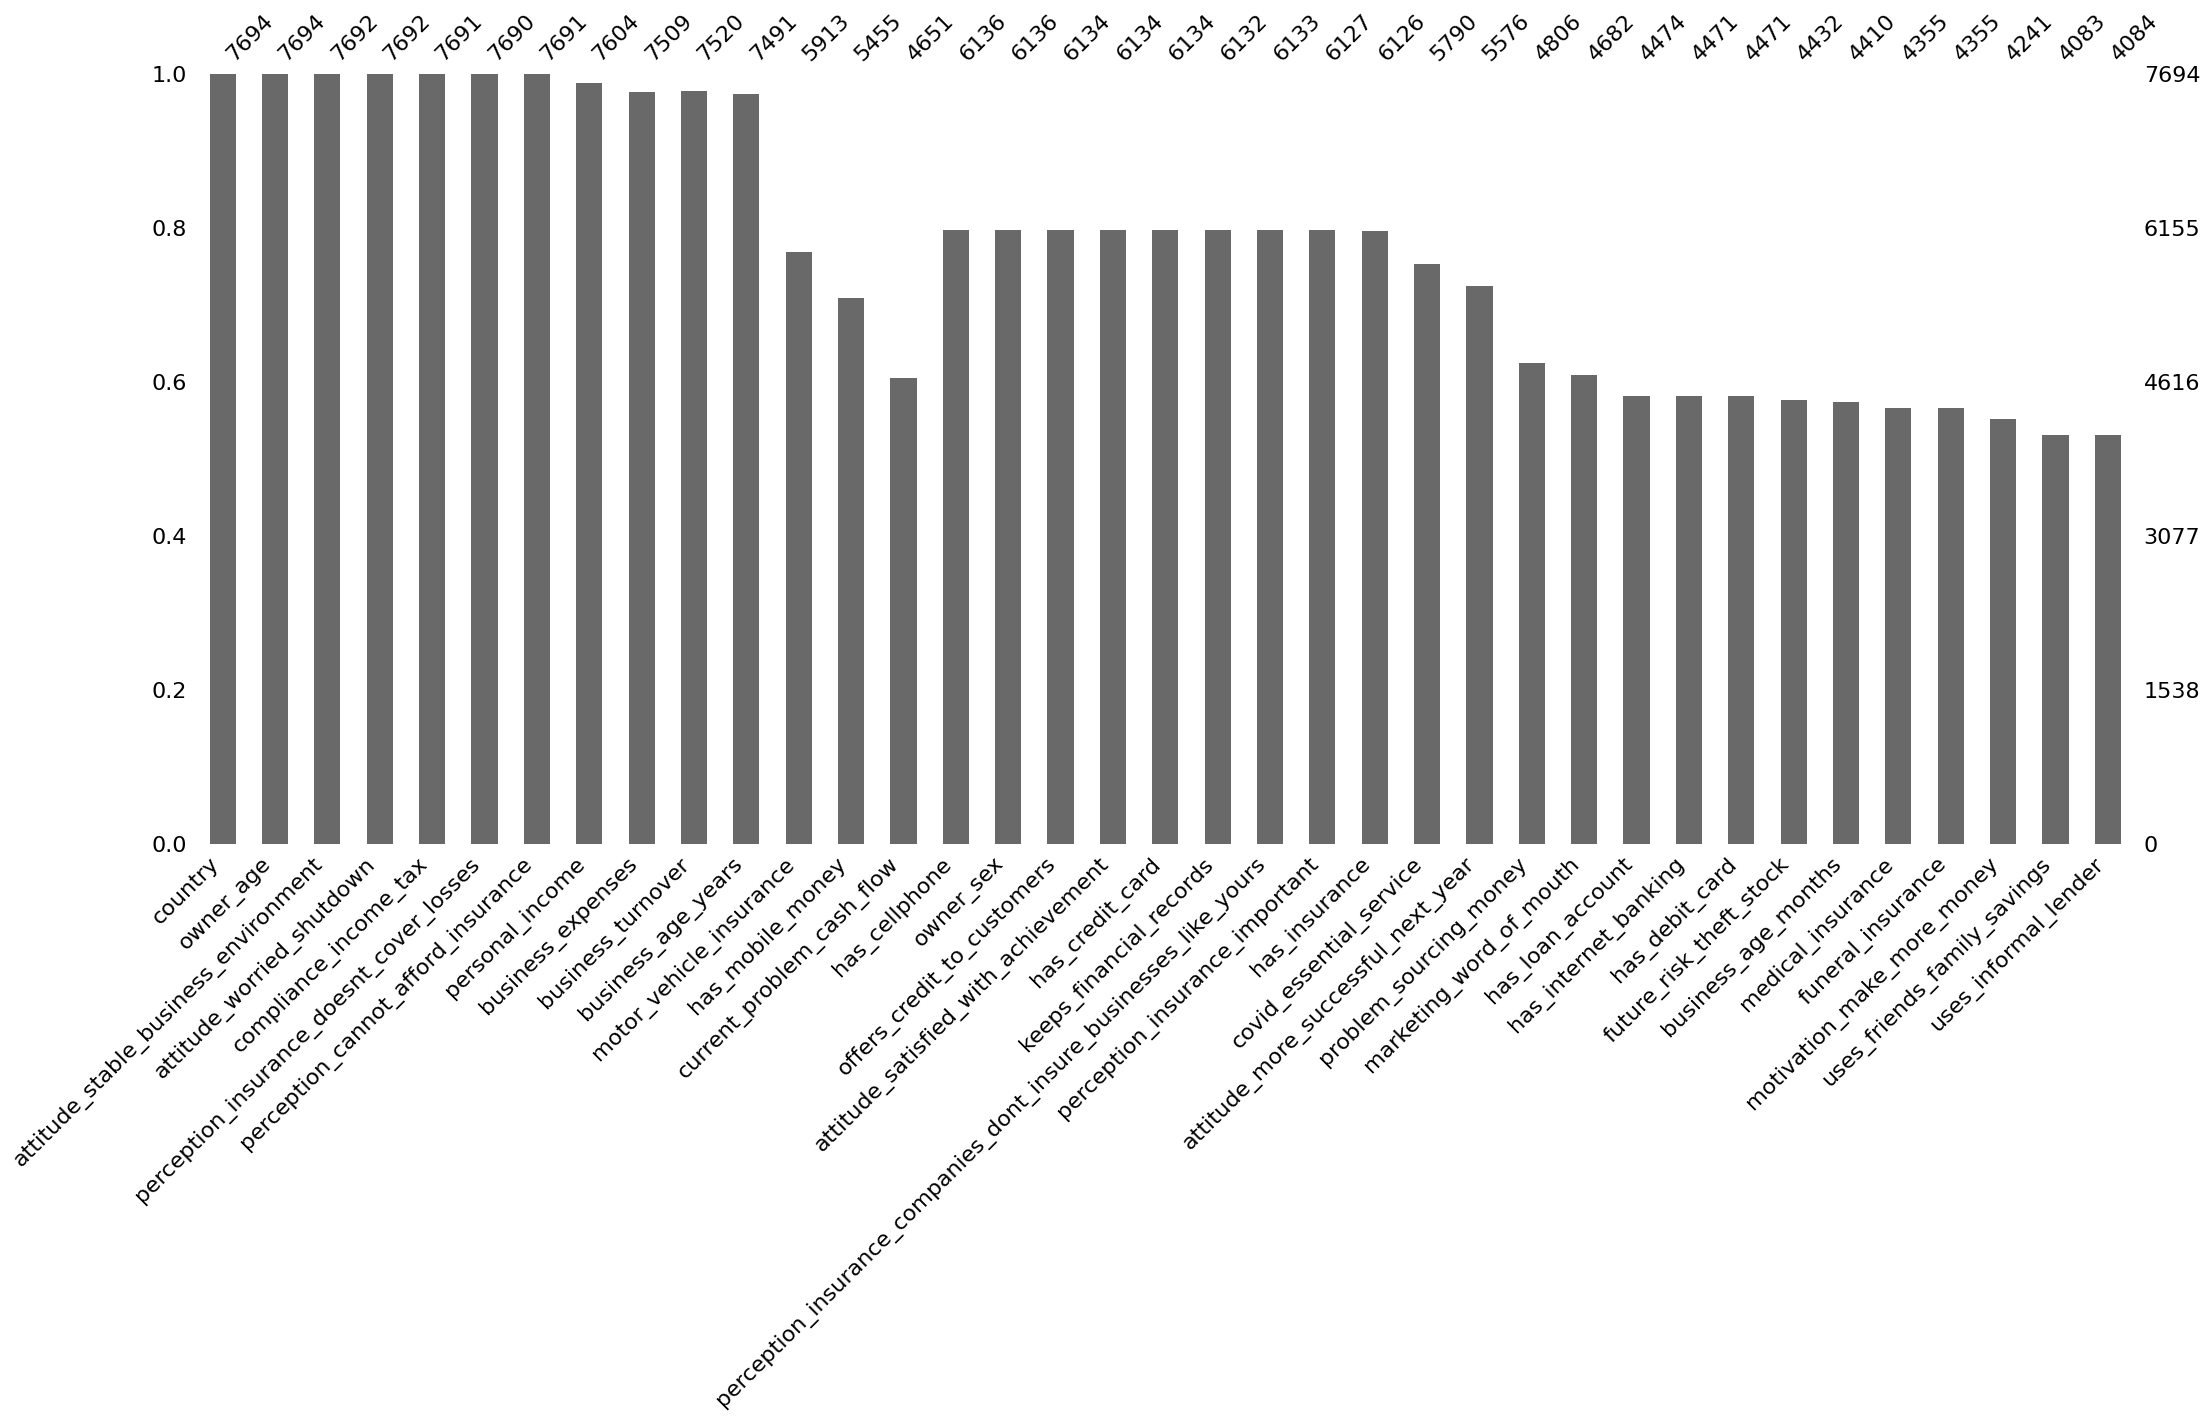

In [39]:
msno.bar(X_train)
plt.show()


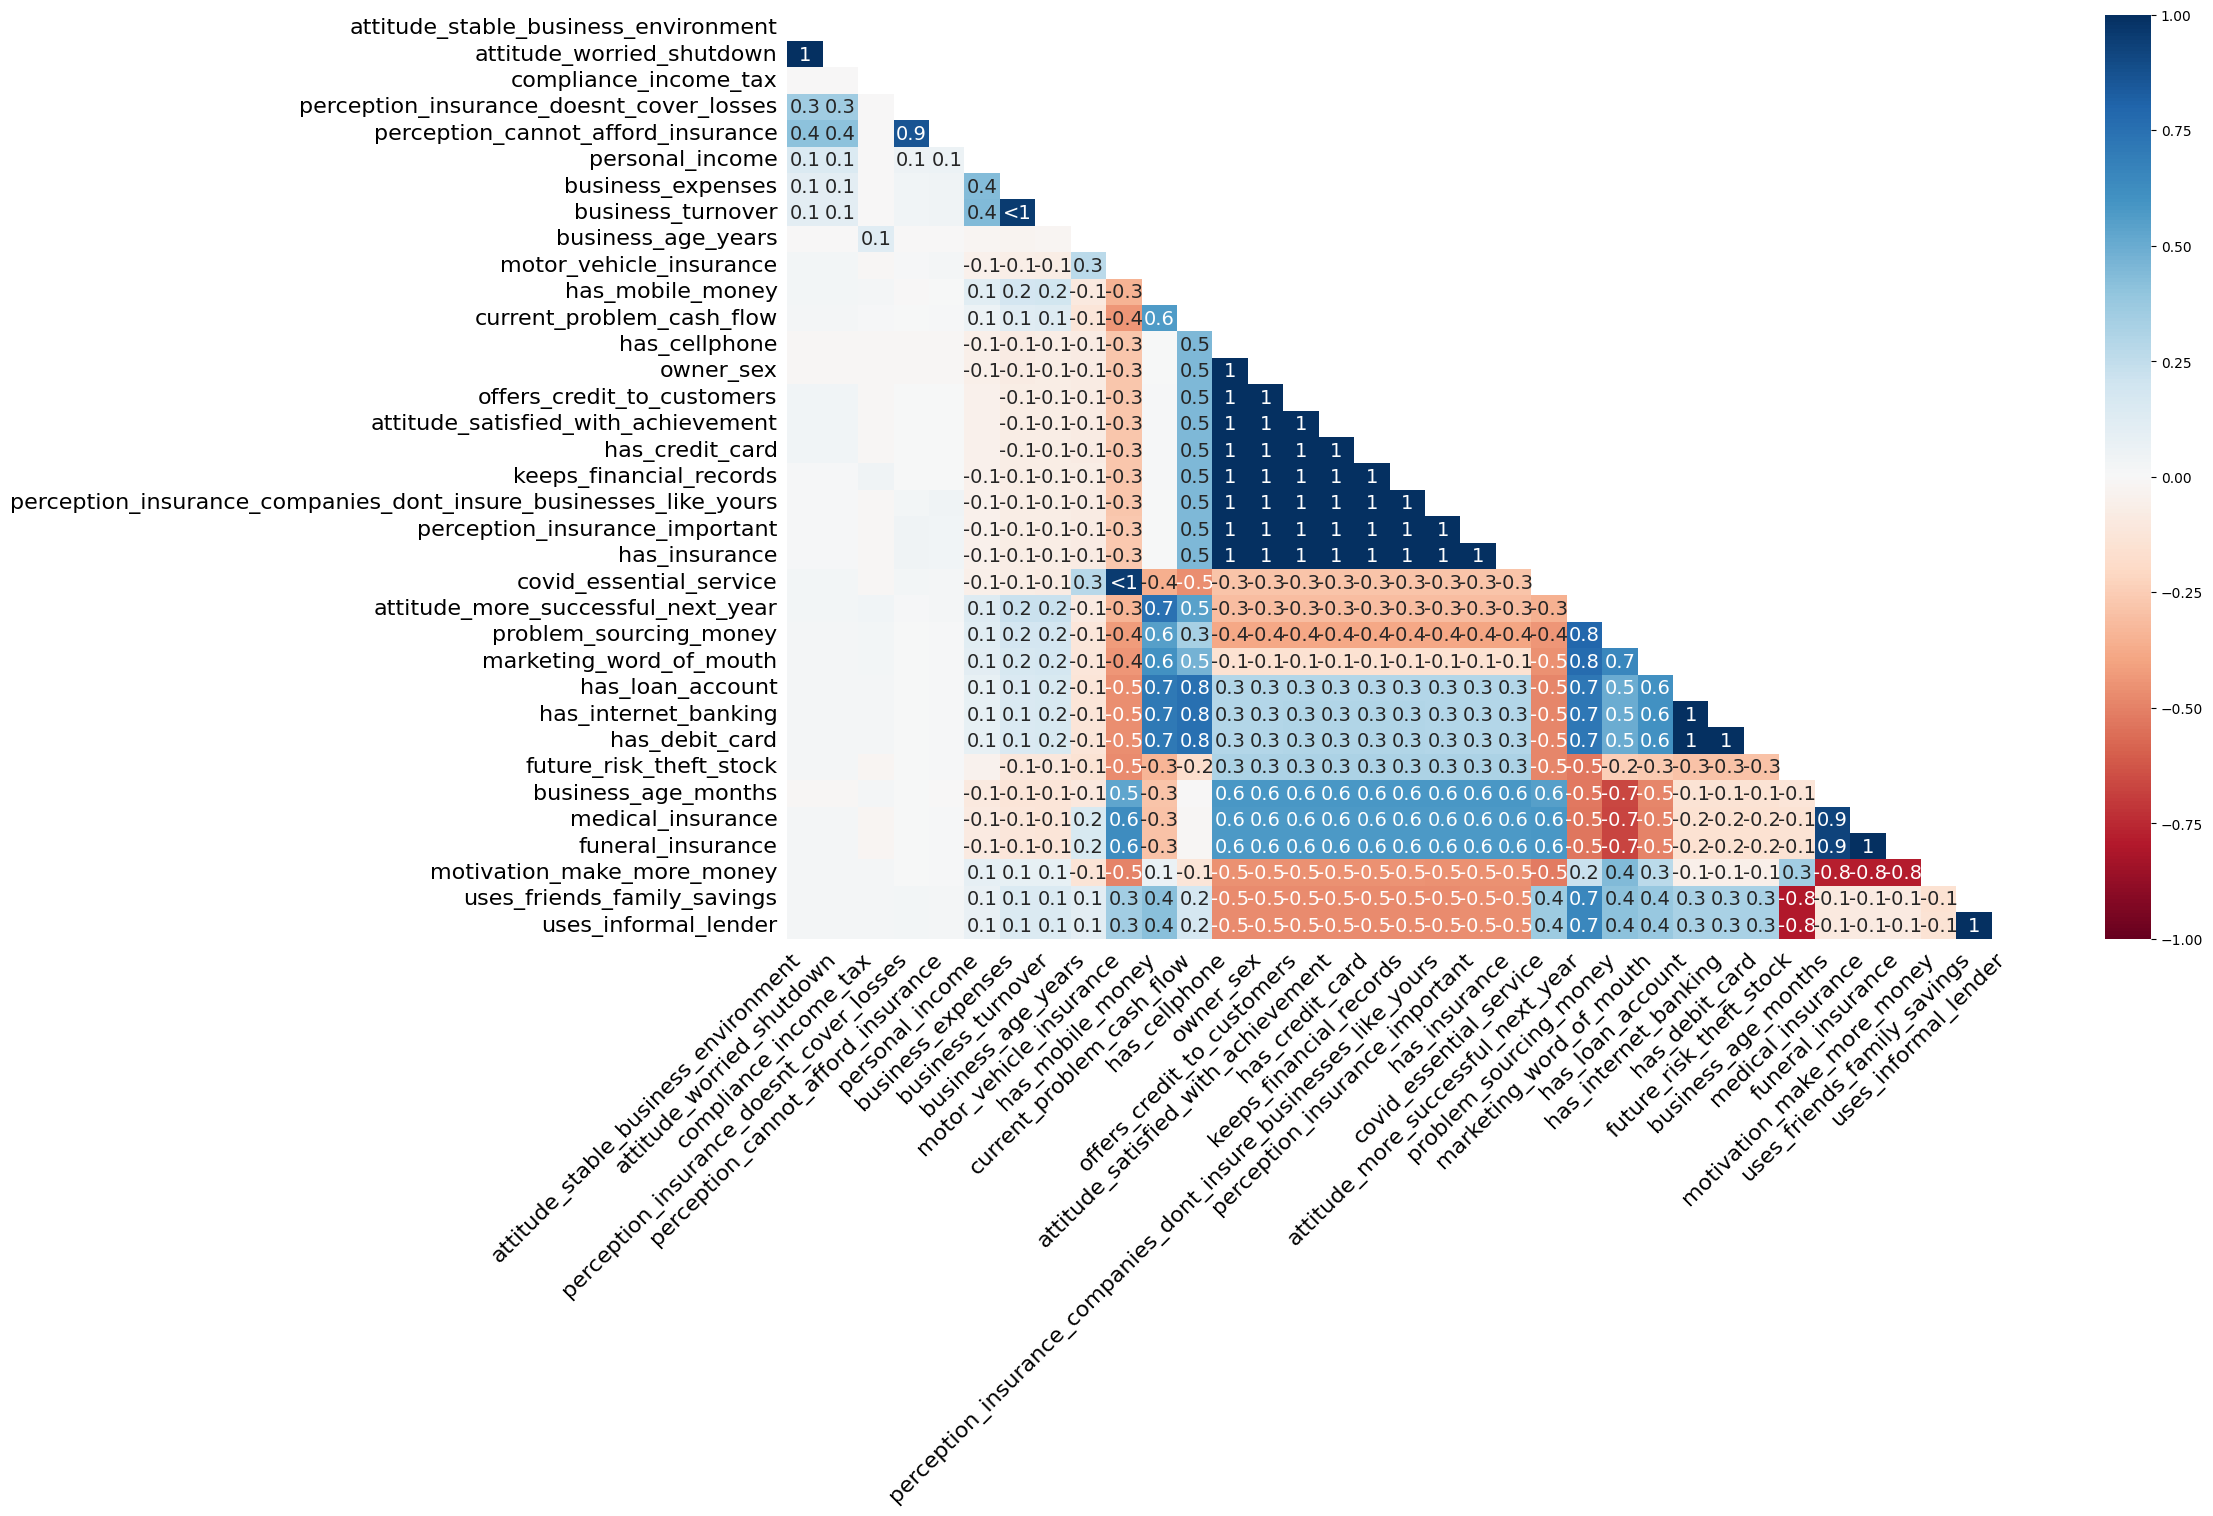

In [40]:
msno.heatmap(X_train)
plt.show()


In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
# Missing values statistics
missing_values = missing_values_table(X_train)
missing_values.head(20)

Your selected dataframe has 37 columns.
There are 35 columns that have missing values.


Missing Values  % of Total Values
uses_friends_family_savings                   3611               46.9
uses_informal_lender                          3610               46.9
motivation_make_more_money                    3453               44.9
funeral_insurance                             3339               43.4
medical_insurance                             3339               43.4
business_age_months                           3284               42.7
future_risk_theft_stock                       3262               42.4
has_debit_card                                3223               41.9
has_internet_banking                          3223               41.9
has_loan_account                              3220               41.9
current_problem_cash_flow                     3043               39.6
marketing_word_of_mouth                       3012               39.1
problem_sourcing_money                        2888               37.5
has_mobile_money                              2239               29.1
attitude_more_successful_next_year            2118               27.5
covid_essential_service                       1904               24.7
motor_vehicle_insurance                       1781               23.1
has_insurance                                 1568               20.4
perception_insurance_important                1567               20.4
keeps_financial_records                       1562               20.3

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

#### Column Types

In [80]:
X_train.dtypes.value_counts()

object     31
float64     5
int64       1
Name: count, dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [13]:
# Number of unique classes in each object column
X_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

country                                                             4
attitude_stable_business_environment                                3
attitude_worried_shutdown                                           3
compliance_income_tax                                               4
perception_insurance_doesnt_cover_losses                            3
perception_cannot_afford_insurance                                  3
motor_vehicle_insurance                                             4
has_mobile_money                                                    5
current_problem_cash_flow                                           3
has_cellphone                                                       2
owner_sex                                                           2
offers_credit_to_customers                                          3
attitude_satisfied_with_achievement                                 4
has_credit_card                                                     5
keeps_financial_reco

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

In [8]:
for col in X_train.select_dtypes('object').columns:
    values = X_train[col].unique()
    values_str = ', '.join(map(str, values))
    print(f"{col}: {values_str}\n")


country: A, C, D, B

attitude_stable_business_environment: Yes, No, Don’t know or N/A, nan

attitude_worried_shutdown: No, Yes, Don’t know or N/A, nan

compliance_income_tax: No, Yes, Don’t know, Refused, nan

perception_insurance_doesnt_cover_losses: Yes, No, Don't know, nan

perception_cannot_afford_insurance: Yes, No, Don't know, nan

motor_vehicle_insurance: Never had, nan, Have now, Used to have but don’t have now, Don't know

has_mobile_money: Never had, nan, Have now, Used to have but don't have now, Used to have but don’t have now, Don't know

current_problem_cash_flow: Yes, nan, No, 0

has_cellphone: Yes, No, nan

owner_sex: Male, Female, nan

offers_credit_to_customers: Yes, sometimes, nan, No, Yes, always

attitude_satisfied_with_achievement: No, Yes, nan, Don't know, Don’t know or N/A

has_credit_card: Never had, nan, Have now, Used to have but don't have now, Don't know, Used to have but don’t have now

keeps_financial_records: No, Yes, Yes, sometimes, nan, Yes, always

pe

In [9]:
X_train['keeps_financial_records'].unique()

array(['No', 'Yes', 'Yes, sometimes', nan, 'Yes, always'], dtype=object)

- current_problem_cash_flow: Yes, nan, No, 0??

### clean columns

In [9]:
# Dictionary of replacements for multiple columns
replacements = {
    'has_loan_account': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'has_mobile_money': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'has_credit_card': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'perception_insurance_companies_dont_insure_businesses_like_yours': {
        "Don't Know": "Don't know"
    },
    'has_internet_banking': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'has_debit_card': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'medical_insurance': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'funeral_insurance': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'uses_friends_family_savings': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'uses_informal_lender': {
        "Used to have but don't have now": "Used to have but don’t have now"
    }
}


# Apply replacements in one line
X_train = X_train.replace(replacements)
X_test = X_test.replace(replacements)

In [10]:
# Number of unique classes in each object column
X_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

country                                                             4
attitude_stable_business_environment                                3
attitude_worried_shutdown                                           3
compliance_income_tax                                               4
perception_insurance_doesnt_cover_losses                            3
perception_cannot_afford_insurance                                  3
motor_vehicle_insurance                                             4
has_mobile_money                                                    4
current_problem_cash_flow                                           3
has_cellphone                                                       2
owner_sex                                                           2
offers_credit_to_customers                                          3
attitude_satisfied_with_achievement                                 4
has_credit_card                                                     4
keeps_financial_reco

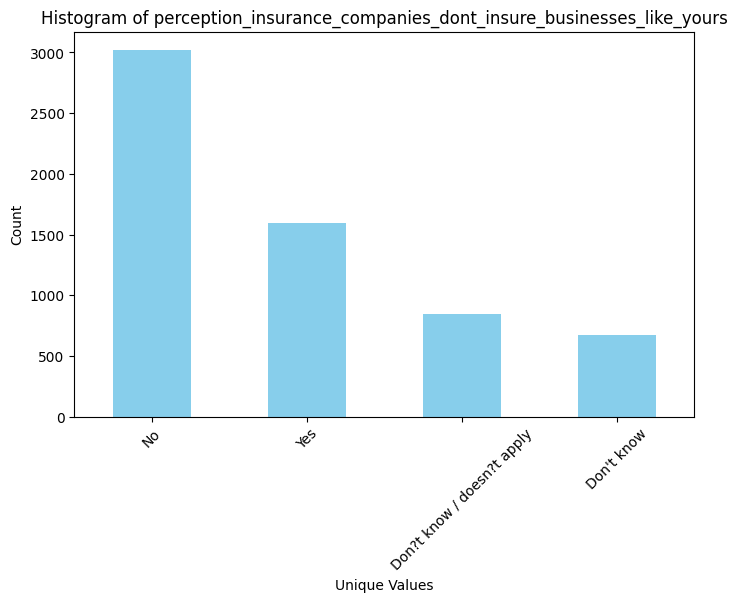

In [11]:
import matplotlib.pyplot as plt

# Count the frequency of each unique value
value_counts = X_train['perception_insurance_companies_dont_insure_businesses_like_yours'].value_counts()

# Plot histogram (bar chart)
plt.figure(figsize=(8,5))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of perception_insurance_companies_dont_insure_businesses_like_yours')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Histogram after imputing missing values with 'missin' also combaining 'Don?t know / doesn?t apply',  "Don't know",
       "Don't Know"

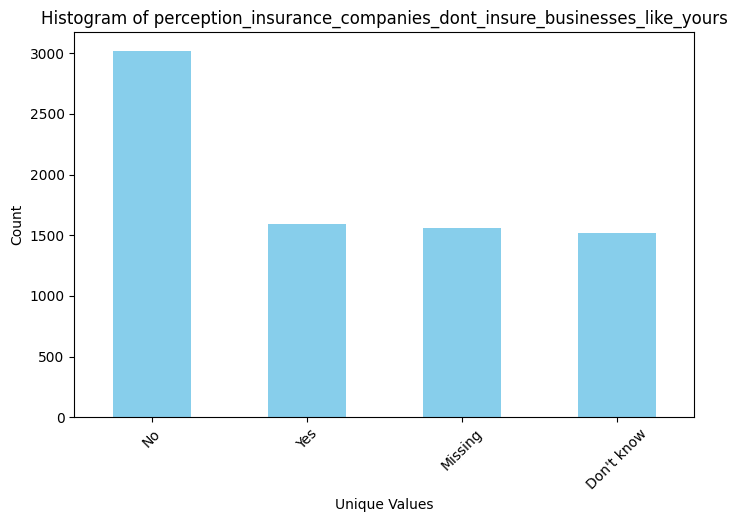

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Make a copy to avoid modifying original
col = X_train['perception_insurance_companies_dont_insure_businesses_like_yours'].copy()

# Standardize similar values
col = col.replace({
    "Don?t know / doesn?t apply": "Don't know",
    "Don't Know": "Don't know"
})

# Optionally fill NaN with a label
col = col.fillna('Missing')

# Count frequencies
value_counts = col.value_counts()

# Plot histogram
plt.figure(figsize=(8,5))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Histogram of perception_insurance_companies_dont_insure_businesses_like_yours')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- Multiple columns contain something like Don’t know / Doesn’t apply and Don't know :<mark>Try combaining them</mark>

# EDA

# Num Cols

In [40]:
num_cols = X_train.select_dtypes(include='number').columns
numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns



## Dist of the data

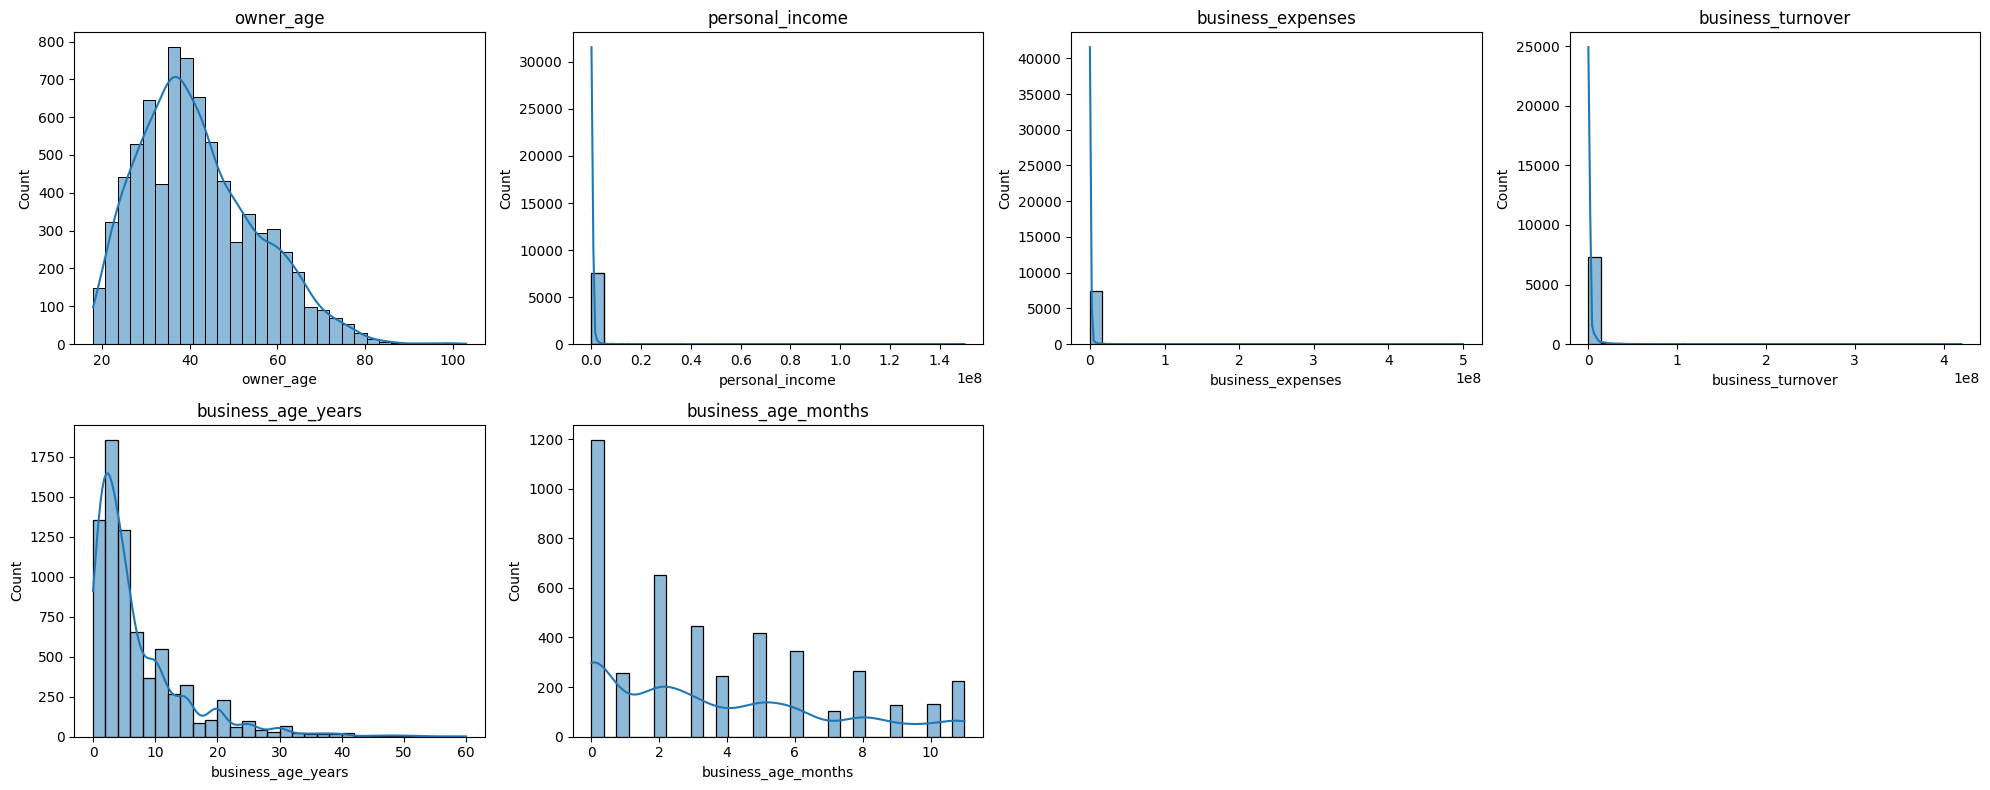

In [22]:
n_cols = 4  # number of plots per row
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

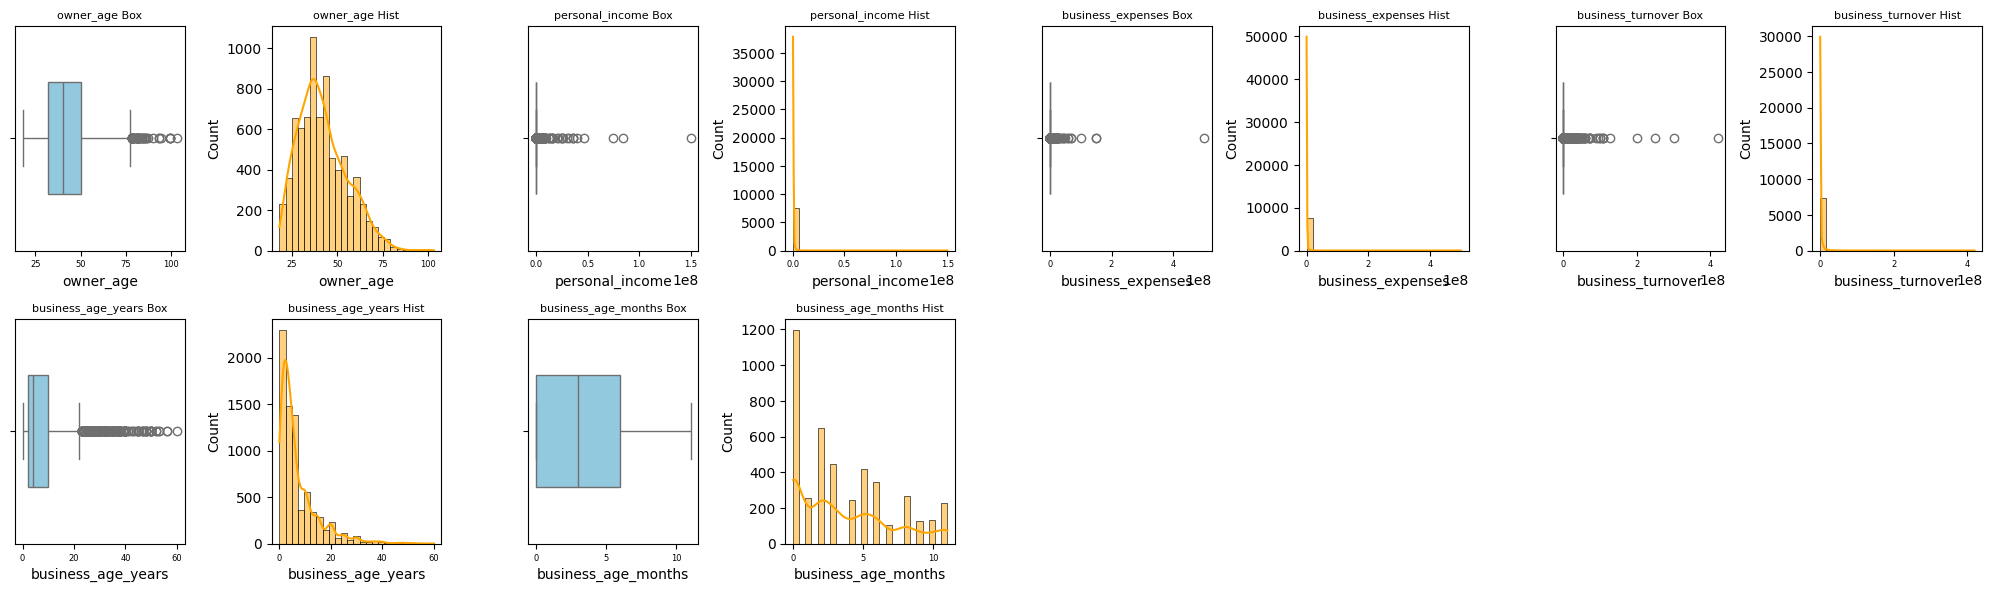

In [23]:
n_features = len(num_cols)

# Layout: 4 features per row, each feature takes 2 columns (boxplot + histogram)
features_per_row = 4
n_cols = features_per_row * 2  # 2 subplots per feature
n_rows = math.ceil(n_features / features_per_row)

plt.figure(figsize=(n_cols*2.5, n_rows*3))  # Adjust figure size

for i, col in enumerate(num_cols):
    # Compute subplot position
    pos_box = i*2 + 1  # Boxplot
    pos_hist = i*2 + 2 # Histogram
    
    # Boxplot
    plt.subplot(n_rows, n_cols, pos_box)
    sns.boxplot(x=X_train[col], color='skyblue', width=0.5)
    plt.title(f'{col} Box', fontsize=8)
    plt.xticks(fontsize=6)
    
    # Histogram
    plt.subplot(n_rows, n_cols, pos_hist)
    sns.histplot(X_train[col], bins=25, kde=True, color='orange')
    plt.title(f'{col} Hist', fontsize=8)
    plt.xticks(fontsize=6)

plt.tight_layout(pad=1.0)
plt.show()

In [50]:
X_train['business_age_months'].unique().value_count()

AttributeError: 'numpy.ndarray' object has no attribute 'value_count'

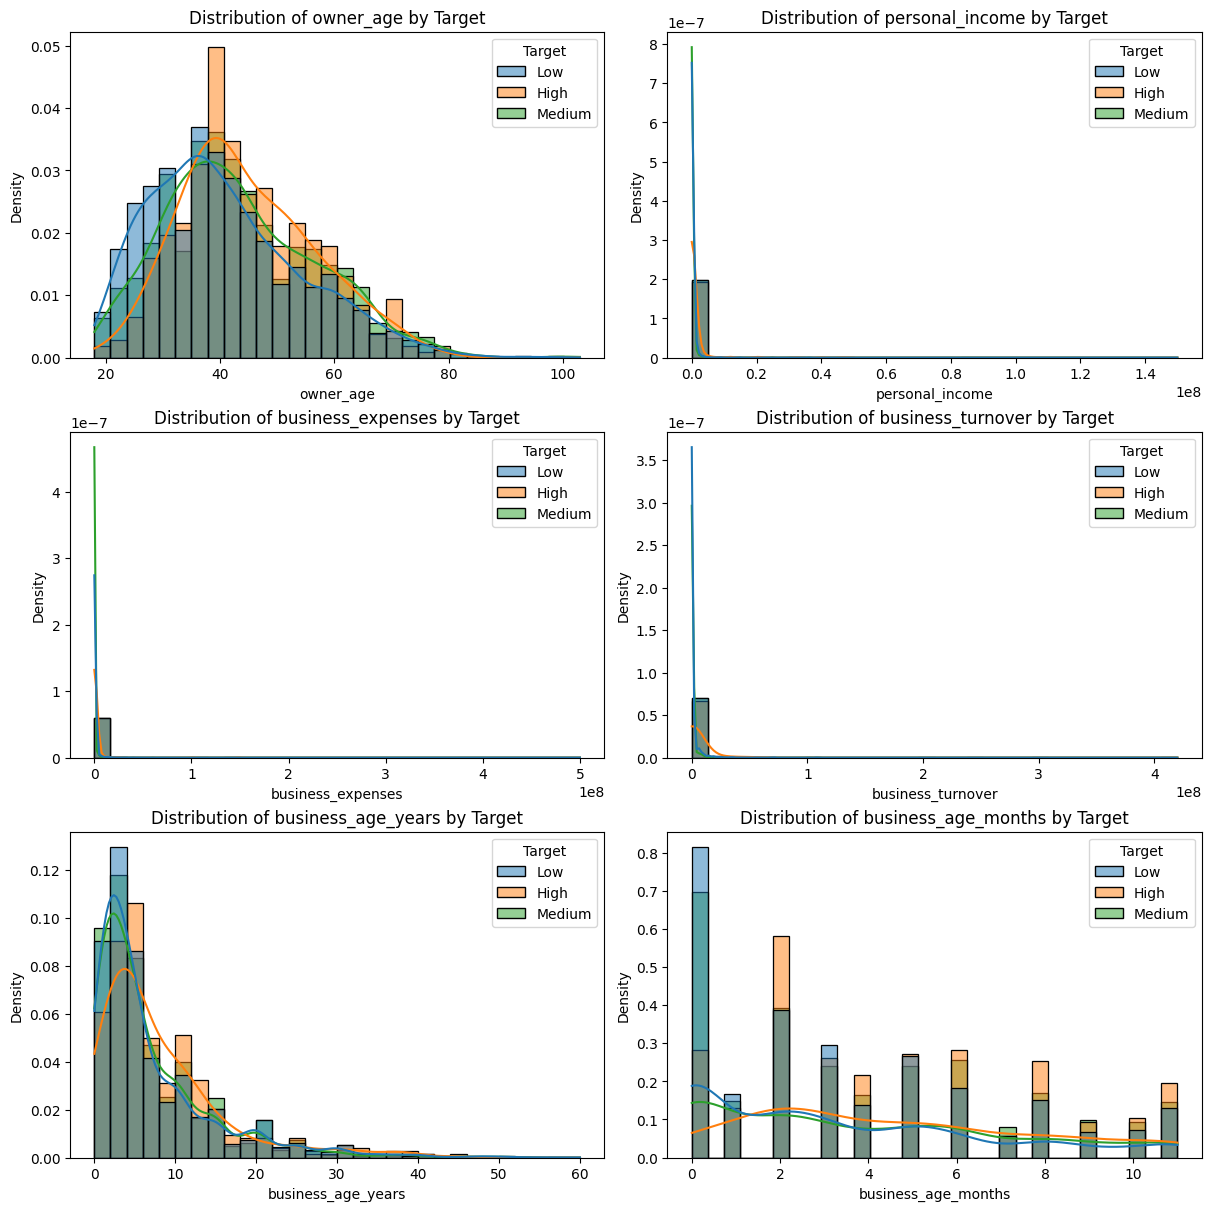

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


train_df = X_train.copy()
train_df['Target'] = y_train

n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    constrained_layout=True
)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        data=train_df,
        x=col,
        hue='Target',
        bins=30,
        kde=True,
        stat='density',
        common_norm=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col} by Target")

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


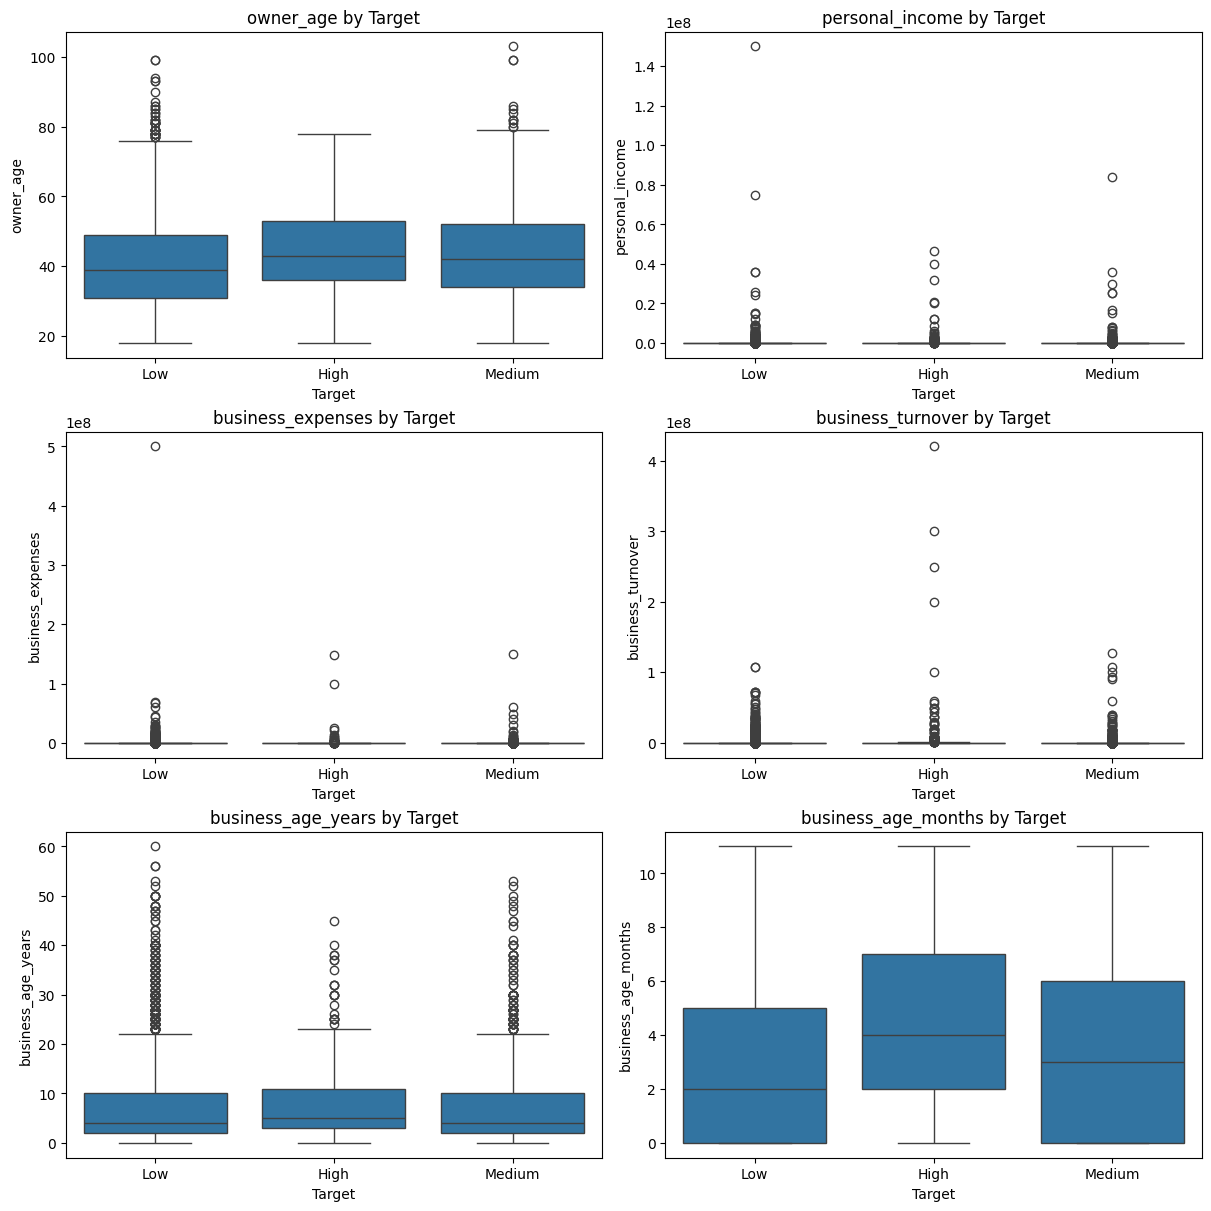

In [21]:
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    constrained_layout=True
)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(
        data=train_df,
        x='Target',
        y=col,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Target")

# Remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


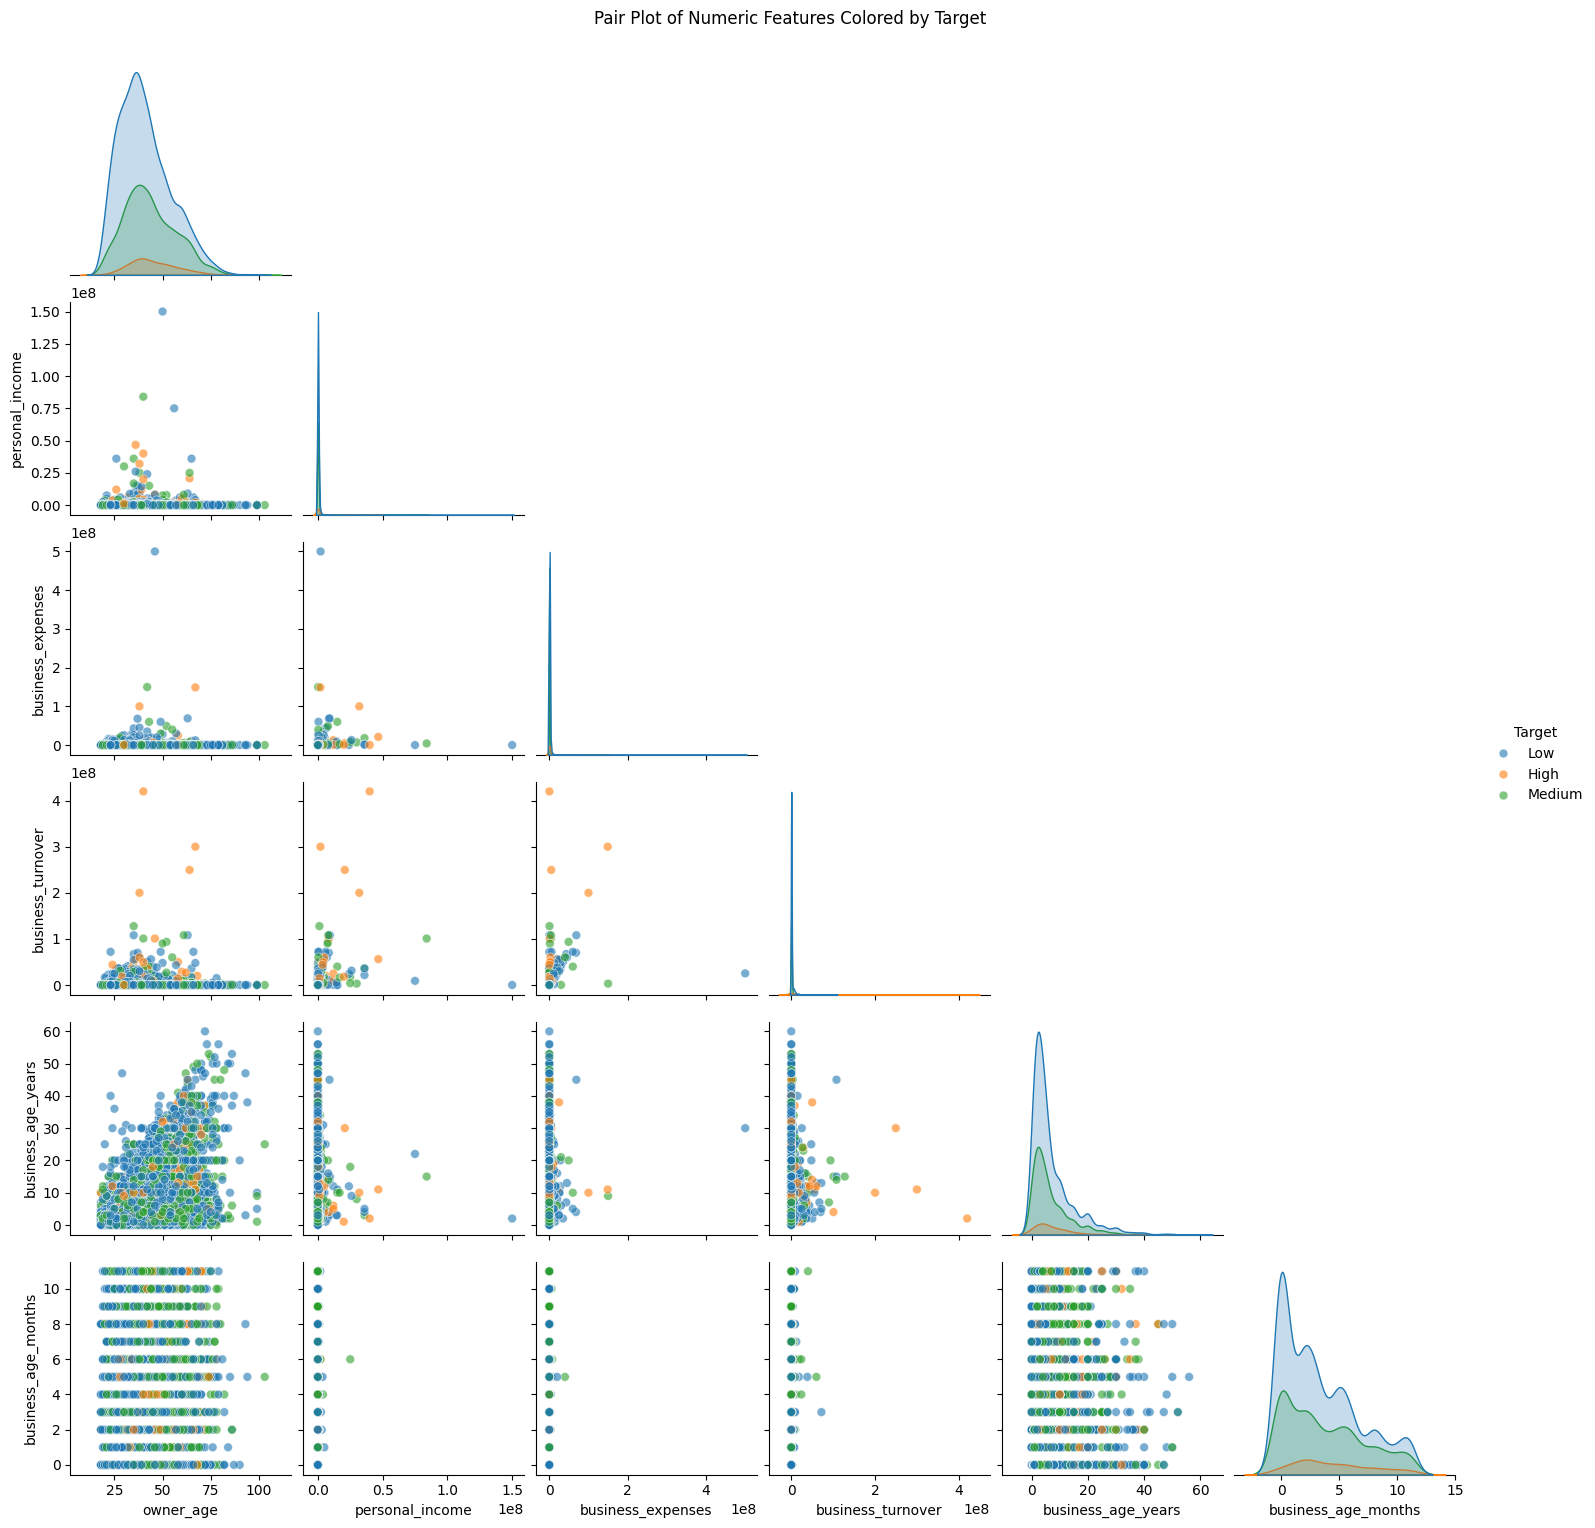

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train and y_train
train_df = X_train.copy()
train_df['Target'] = y_train

# Select only numeric columns for pairplot
num_cols = train_df.select_dtypes(include='number').columns
pairplot_df = train_df[num_cols.to_list() + ['Target']]


sns.pairplot(pairplot_df, hue='Target', diag_kind='kde', corner=True, plot_kws={'alpha':0.6, 's':40})
plt.suptitle('Pair Plot of Numeric Features Colored by Target', y=1.02)
plt.show()


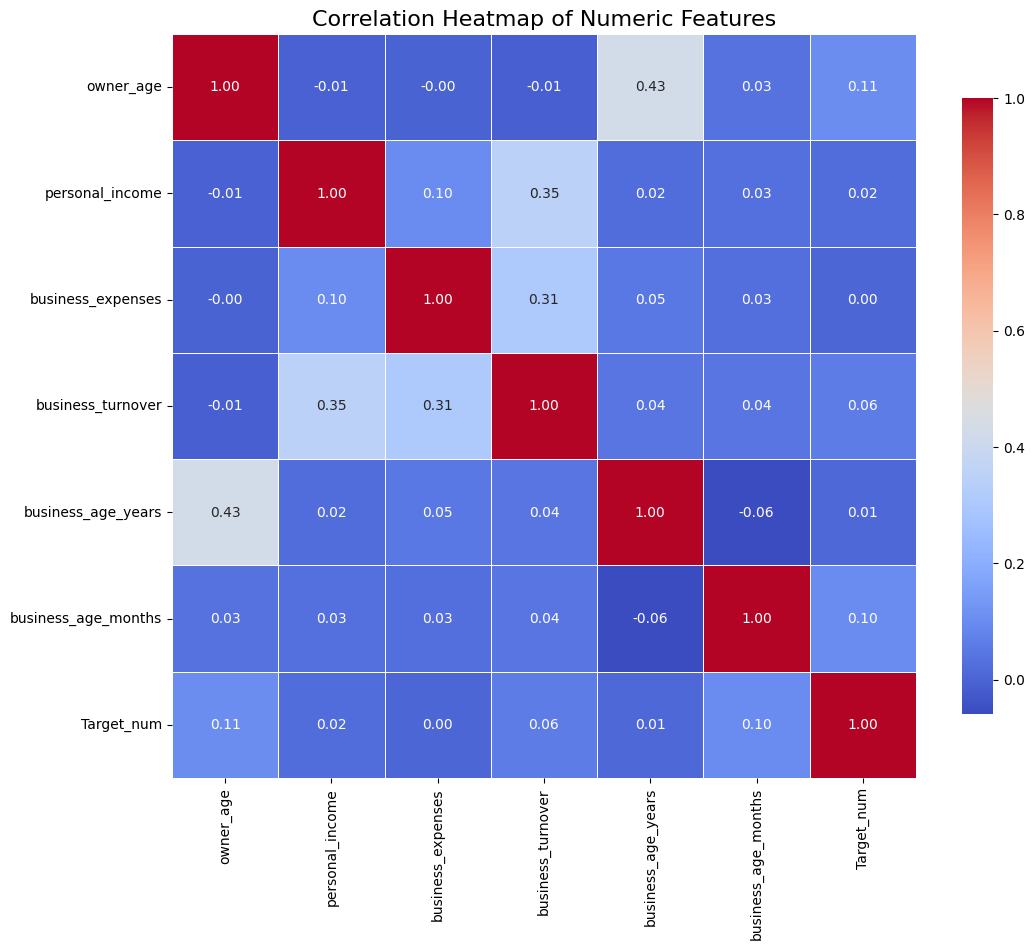

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy train data
train_df = X_train.copy()
train_df['Target'] = y_train

# Encode Target to numeric for correlation
train_df['Target_num'] = train_df['Target'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Select only numeric columns
num_cols = train_df.select_dtypes(include='number').columns
corr_df = train_df[num_cols]
corr_matrix = corr_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    fmt=".2f",
    cmap='coolwarm',   # blue = negative, red = positive
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


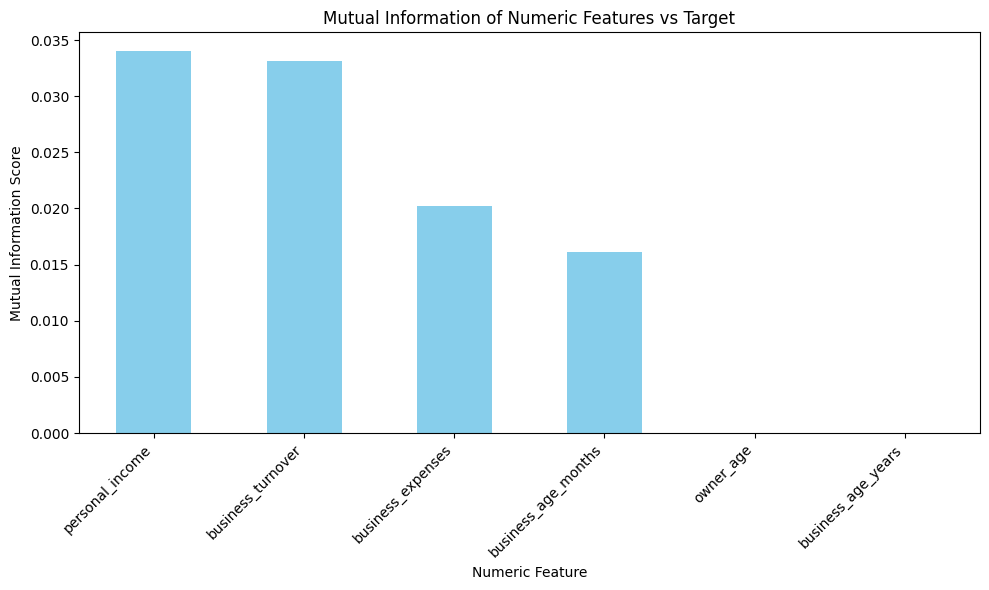

In [24]:
from sklearn.impute import SimpleImputer
import numpy as np

# Numeric features
num_cols = X_train.select_dtypes(include='number').columns
X_num = X_train[num_cols].copy()

# Simple imputer: fill NaN with median (robust)
imputer = SimpleImputer(strategy='median')
X_num_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=num_cols)

from sklearn.feature_selection import mutual_info_classif


mi_scores = mutual_info_classif(X_num_imputed, y_train, discrete_features=False, random_state=42)
mi_series = pd.Series(mi_scores, index=num_cols).sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
mi_series.plot(kind='bar', color='skyblue')
plt.title("Mutual Information of Numeric Features vs Target")
plt.ylabel("Mutual Information Score")
plt.xlabel("Numeric Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



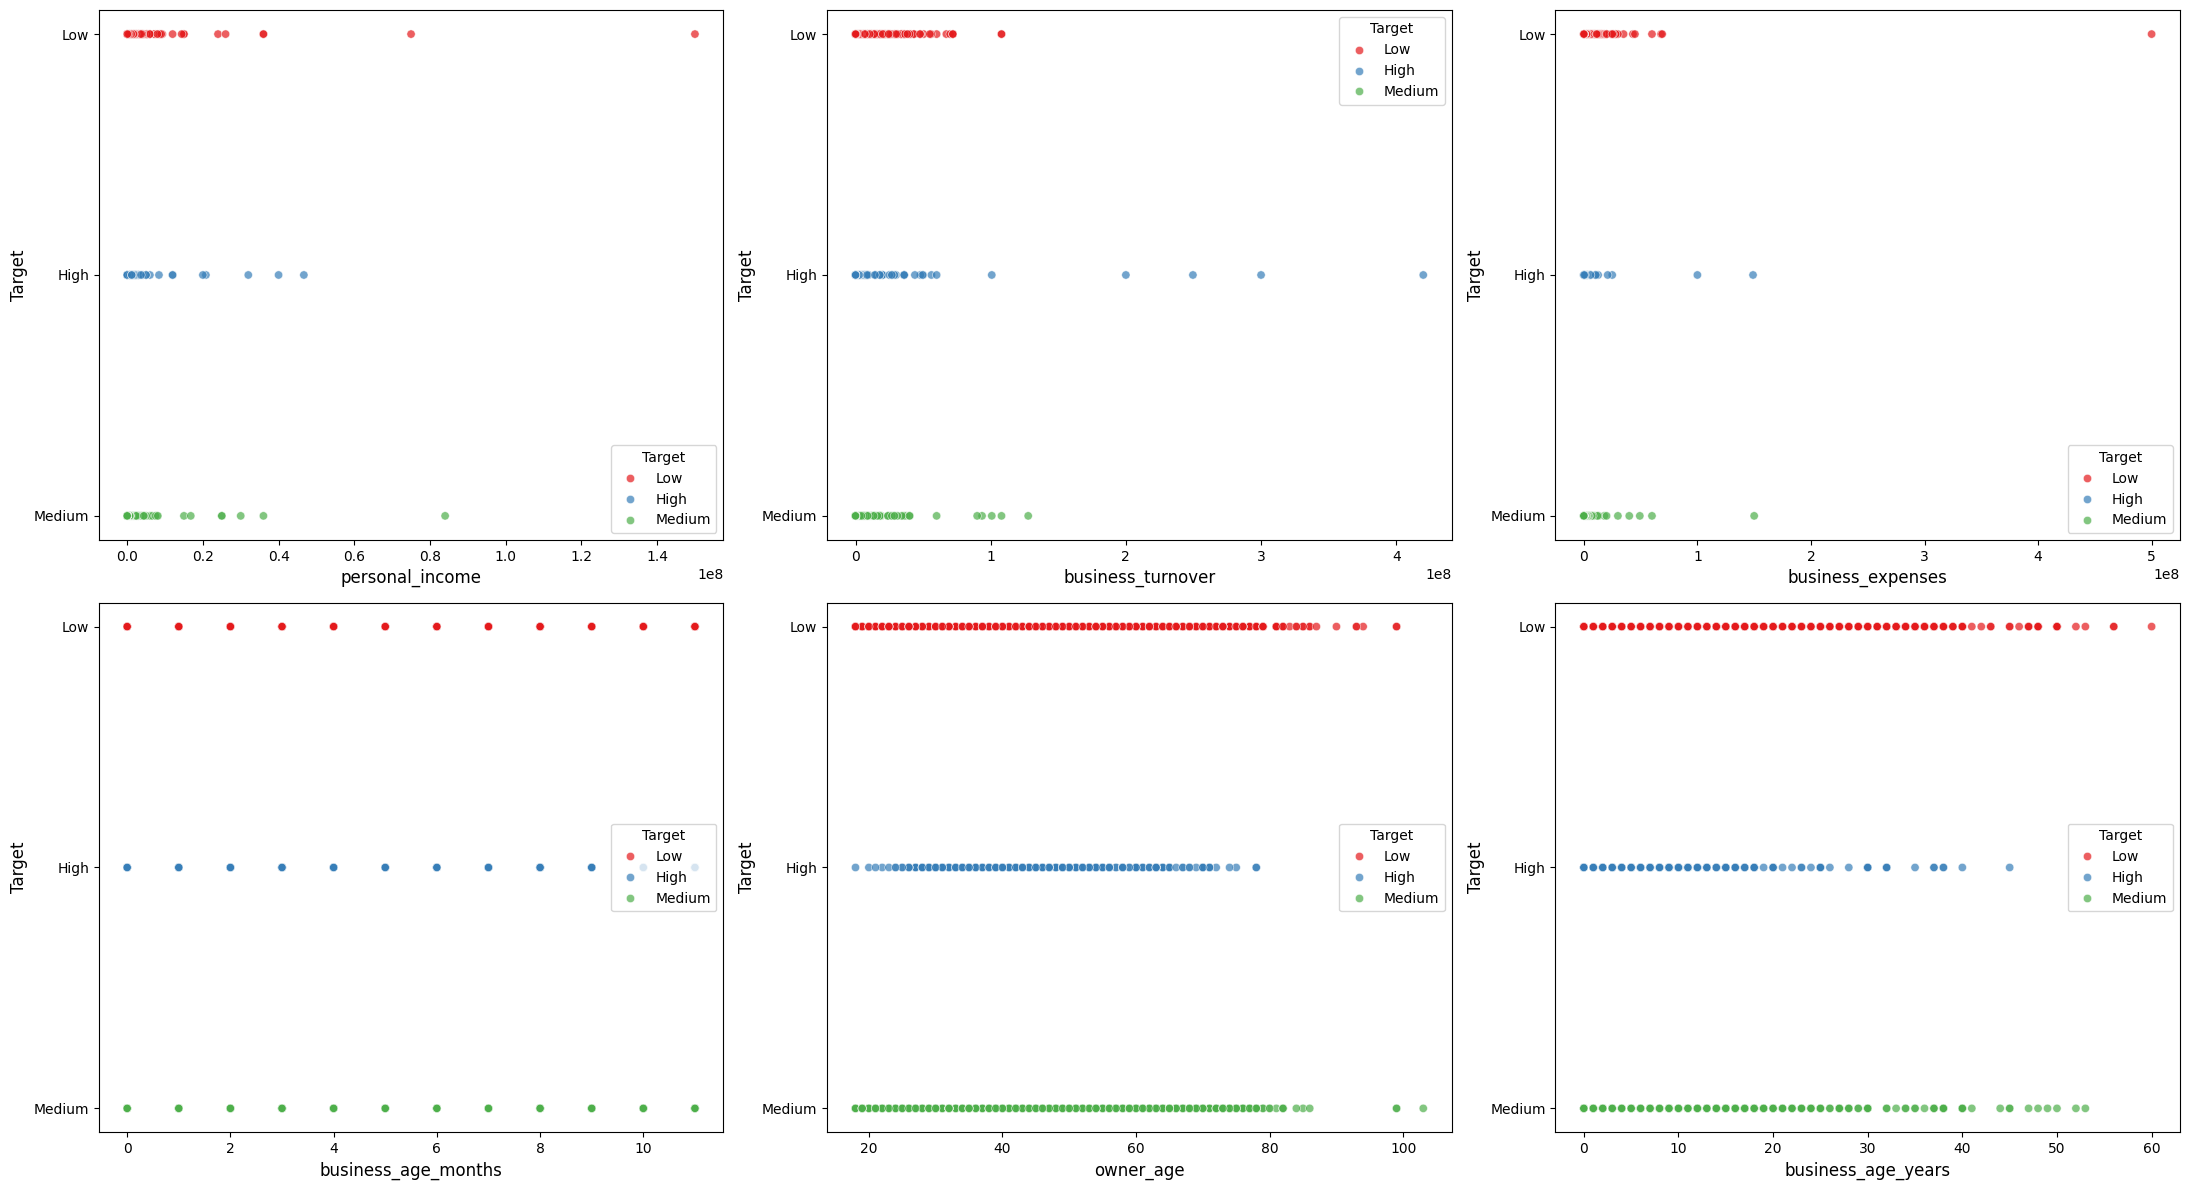

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

top_numeric = mi_series.head(6).index.tolist()



fig, ax = plt.subplots(2, 3, figsize=(22, 12))

for var, subplot in zip(top_numeric, ax.flatten()):
    sns.scatterplot(
        x=var,
        y='Target',
        data=train_df,
        ax=subplot,
        hue='Target',
        palette='Set1',
        alpha=0.7
    )
    subplot.set_xlabel(var, fontsize=12)
    subplot.set_ylabel('Target', fontsize=12)

plt.tight_layout()
plt.show()


# Cat Cols

In [12]:
cat_cols = X_train.select_dtypes(
    include=['object', 'category', 'bool']
).columns

In [15]:
train_df = X_train.copy()
train_df['Target'] = y_train

target_order = ['Low', 'Medium', 'High']

for col in cat_cols:
    ct = pd.crosstab(
        train_df[col],
        train_df['Target'],
        normalize='index'
    )
    ct = ct[target_order]  # reorder columns
    print(f"\nTarget distribution by: {col}")
    print(ct)



Target distribution by: country
Target        Low    Medium      High
country                              
A        0.505198  0.381380  0.113422
B        0.603979  0.392811  0.003209
C        0.818086  0.138801  0.043113
D        0.688385  0.288480  0.023135

Target distribution by: attitude_stable_business_environment
Target                                     Low    Medium      High
attitude_stable_business_environment                              
Don’t know or N/A                     0.773985  0.186347  0.039668
No                                    0.675635  0.277157  0.047208
Yes                                   0.614920  0.333333  0.051746

Target distribution by: attitude_worried_shutdown
Target                          Low    Medium      High
attitude_worried_shutdown                              
Don’t know or N/A          0.689655  0.256158  0.054187
No                         0.619822  0.327912  0.052266
Yes                        0.703266  0.253648  0.043085

Target dis

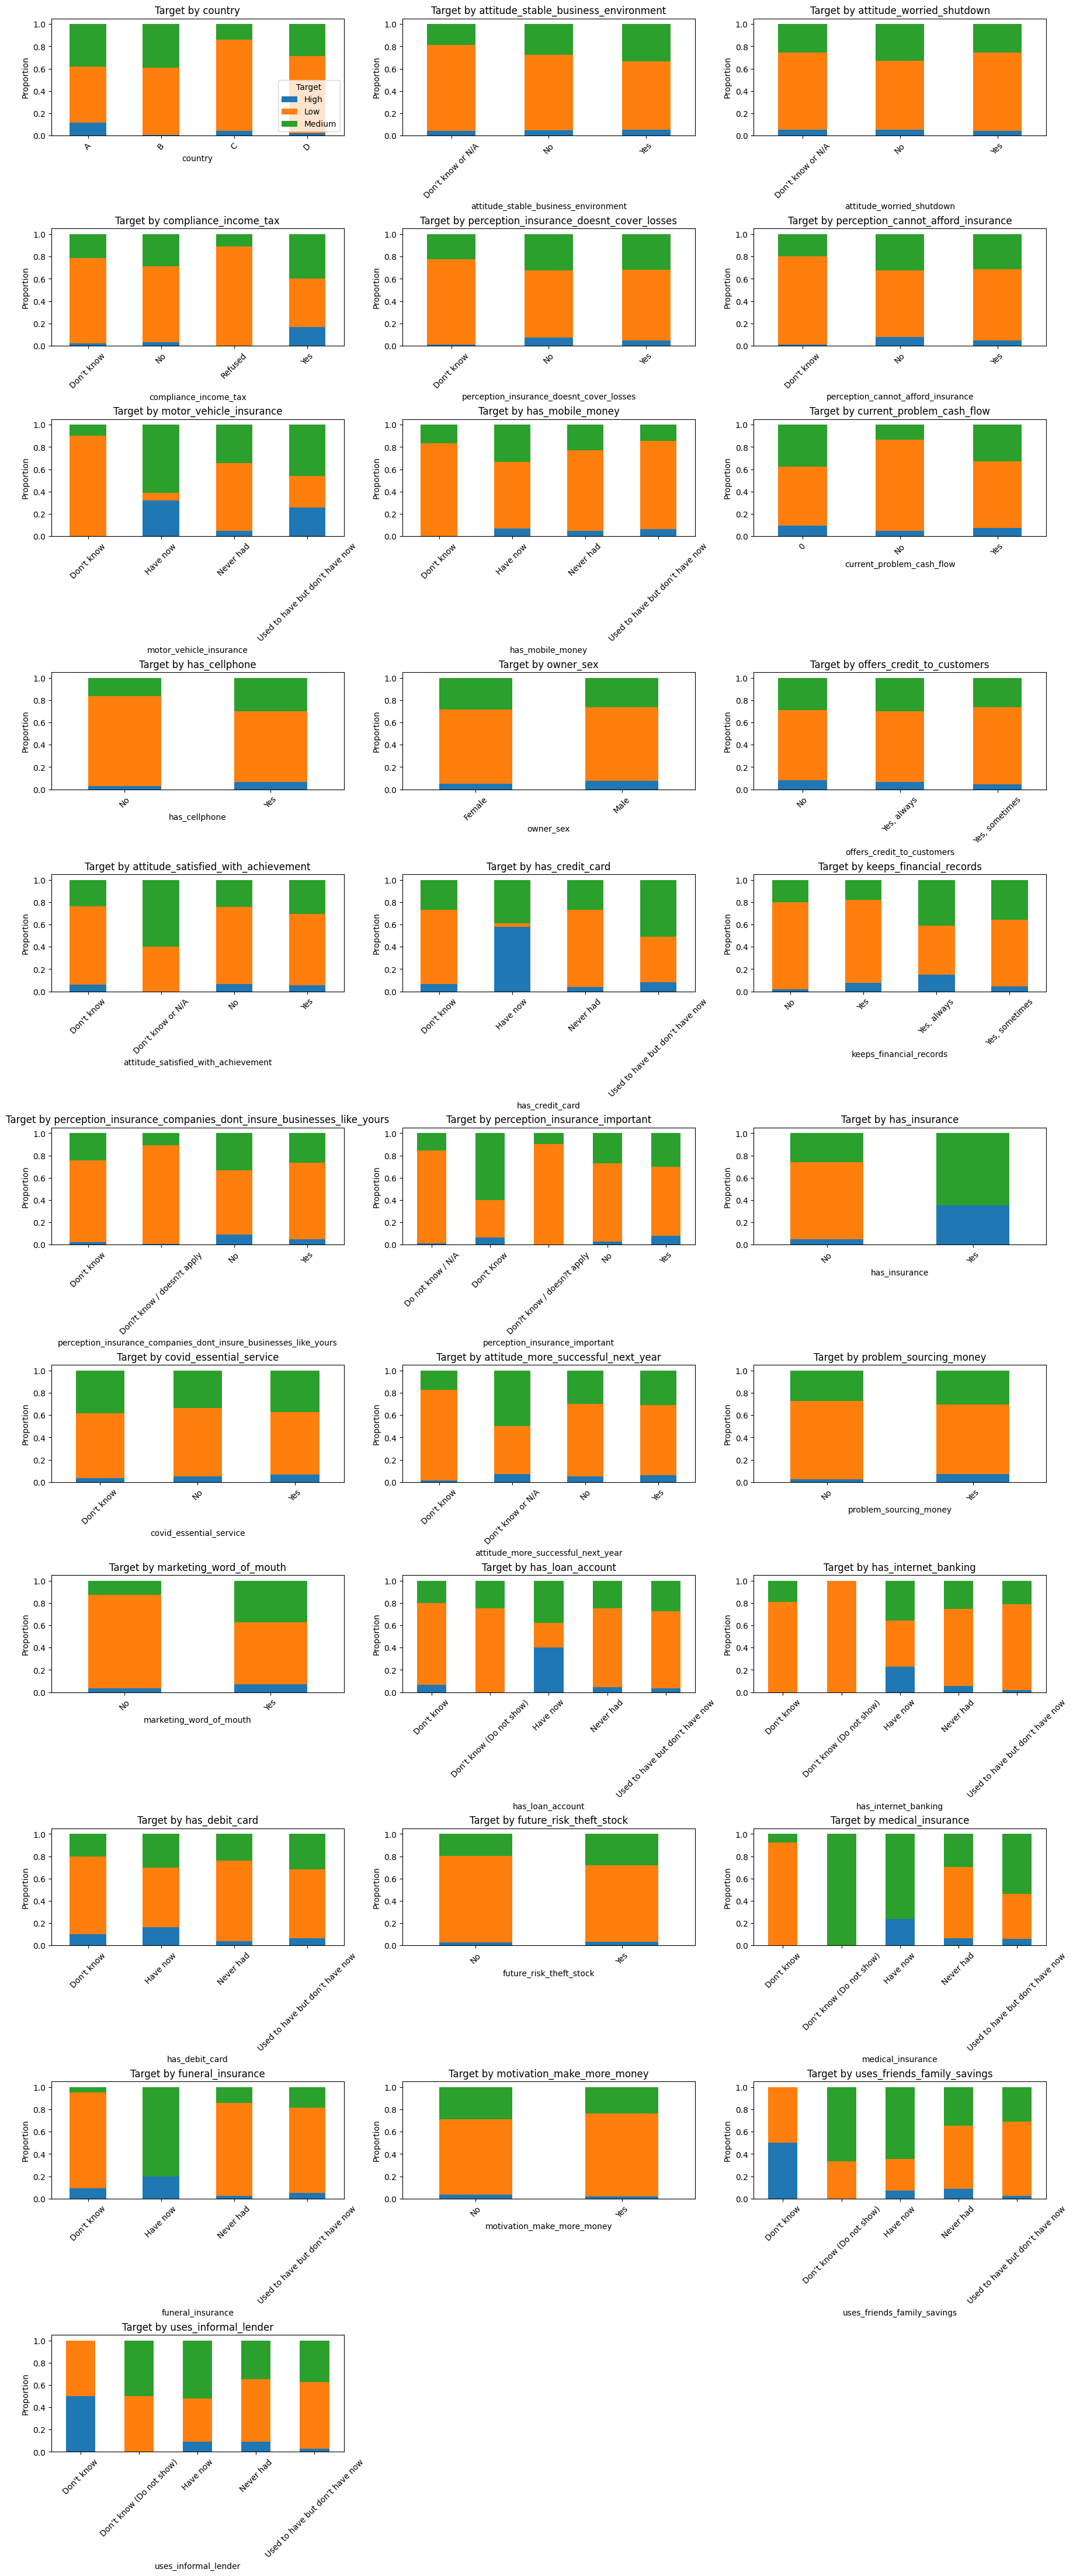

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import math

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    constrained_layout=True
)

axes = axes.flatten()  # easier indexing

for i, col in enumerate(cat_cols):
    ct = pd.crosstab(
        X_train[col],
        y_train,
        normalize='index'
    )

    ct.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        legend=(i == 0)  # show legend only once
    )

    axes[i].set_title(f"Target by {col}")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()



has_loan_account vs some numeric features

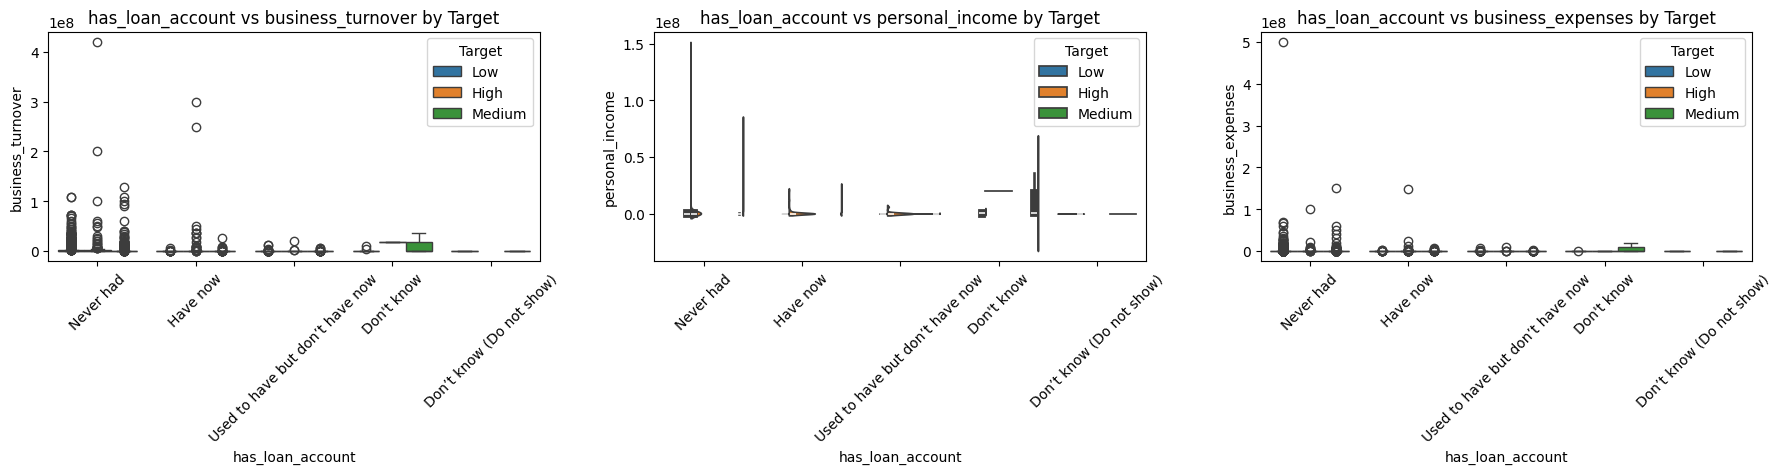

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train
train_df = X_train.copy()
train_df['Target'] = y_train

# Choose a categorical feature and 3 numeric features to compare
cat_feature = 'has_loan_account'
num_features = ['business_turnover', 'personal_income', 'business_expenses']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot 1
sns.boxplot(x=cat_feature, y=num_features[0], hue='Target', data=train_df, ax=axes[0])
axes[0].set_title(f'{cat_feature} vs {num_features[0]} by Target')
axes[0].tick_params(axis='x', rotation=45)

# Violinplot 2
sns.violinplot(x=cat_feature, y=num_features[1], hue='Target', data=train_df, split=True, ax=axes[1])
axes[1].set_title(f'{cat_feature} vs {num_features[1]} by Target')
axes[1].tick_params(axis='x', rotation=45)

# Boxplot 3
sns.boxplot(x=cat_feature, y=num_features[2], hue='Target', data=train_df, ax=axes[2])
axes[2].set_title(f'{cat_feature} vs {num_features[2]} by Target')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


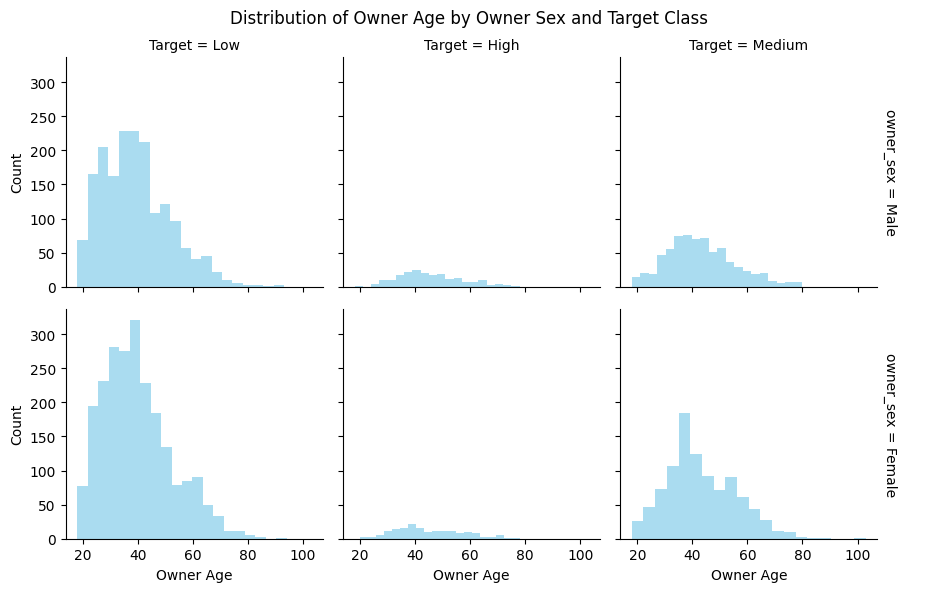

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train and y_train
train_df = X_train.copy()
train_df['Target'] = y_train

# FacetGrid: owner_age distribution by owner_sex and Target
g = sns.FacetGrid(train_df, row='owner_sex', col='Target', margin_titles=True)
g.map(plt.hist, 'owner_age', bins=20, alpha=0.7, color='skyblue')
g.set_axis_labels('Owner Age', 'Count')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Owner Age by Owner Sex and Target Class')
g.add_legend()
plt.show()


### Mutual info

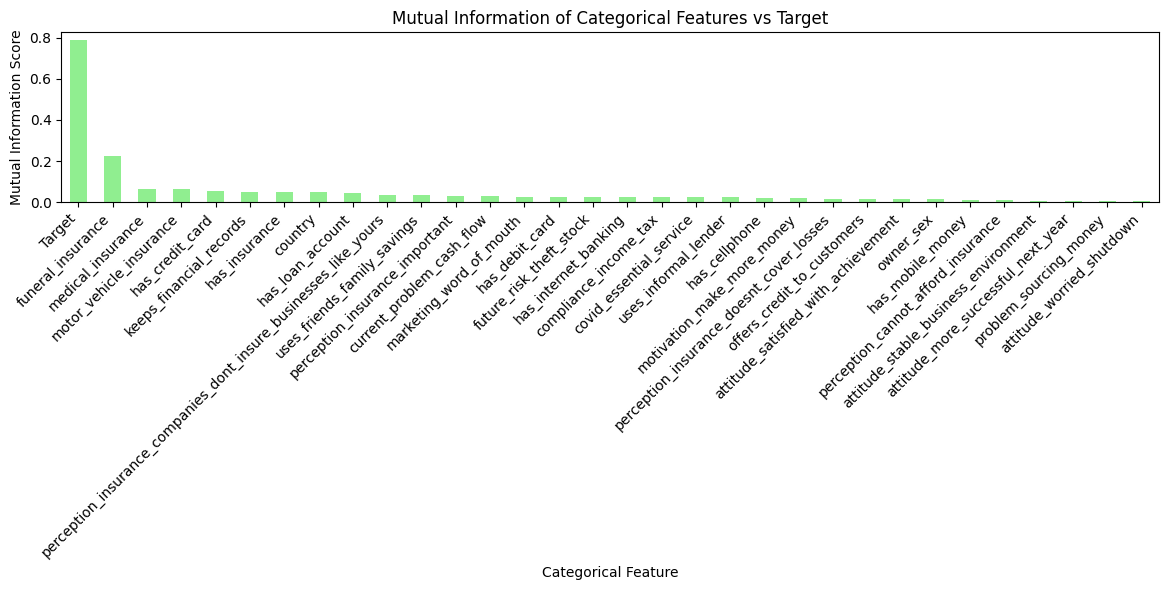

Top categorical features by MI: ['Target', 'funeral_insurance', 'medical_insurance', 'motor_vehicle_insurance', 'has_credit_card', 'keeps_financial_records']


In [82]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Copy dataset
train_df = X_train.copy()
train_df['Target'] = y_train

# Categorical features
cat_cols = train_df.select_dtypes(include=['object', 'category', 'bool']).columns
X_cat = train_df[cat_cols].copy()

# Fill missing values
X_cat.fillna("Missing", inplace=True)

# Encode categorical features numerically
encoder = OrdinalEncoder()
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat), columns=cat_cols)


y = train_df['Target']

mi_scores_cat = mutual_info_classif(X_cat_encoded, y, discrete_features=True, random_state=42)
mi_cat_series = pd.Series(mi_scores_cat, index=cat_cols).sort_values(ascending=False)


plt.figure(figsize=(12,6))
mi_cat_series.plot(kind='bar', color='lightgreen')
plt.title("Mutual Information of Categorical Features vs Target")
plt.ylabel("Mutual Information Score")
plt.xlabel("Categorical Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select top 6 categorical features
top_categorical = mi_cat_series.head(6).index.tolist()
print("Top categorical features by MI:", top_categorical)

In [ ]:
# visualize the relationship between the top categorical features (based on mutual information) and the Target
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 2, figsize=(22, 18))

for var, subplot in zip(top_categorical, ax.flatten()):
    sns.swarmplot(x=var, y='Target', data=train_df, ax=subplot, palette='Set3')
    subplot.set_xlabel(var, fontsize=12)
    subplot.set_ylabel('Target', fontsize=12)
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

**all categorical columns including nan values.**

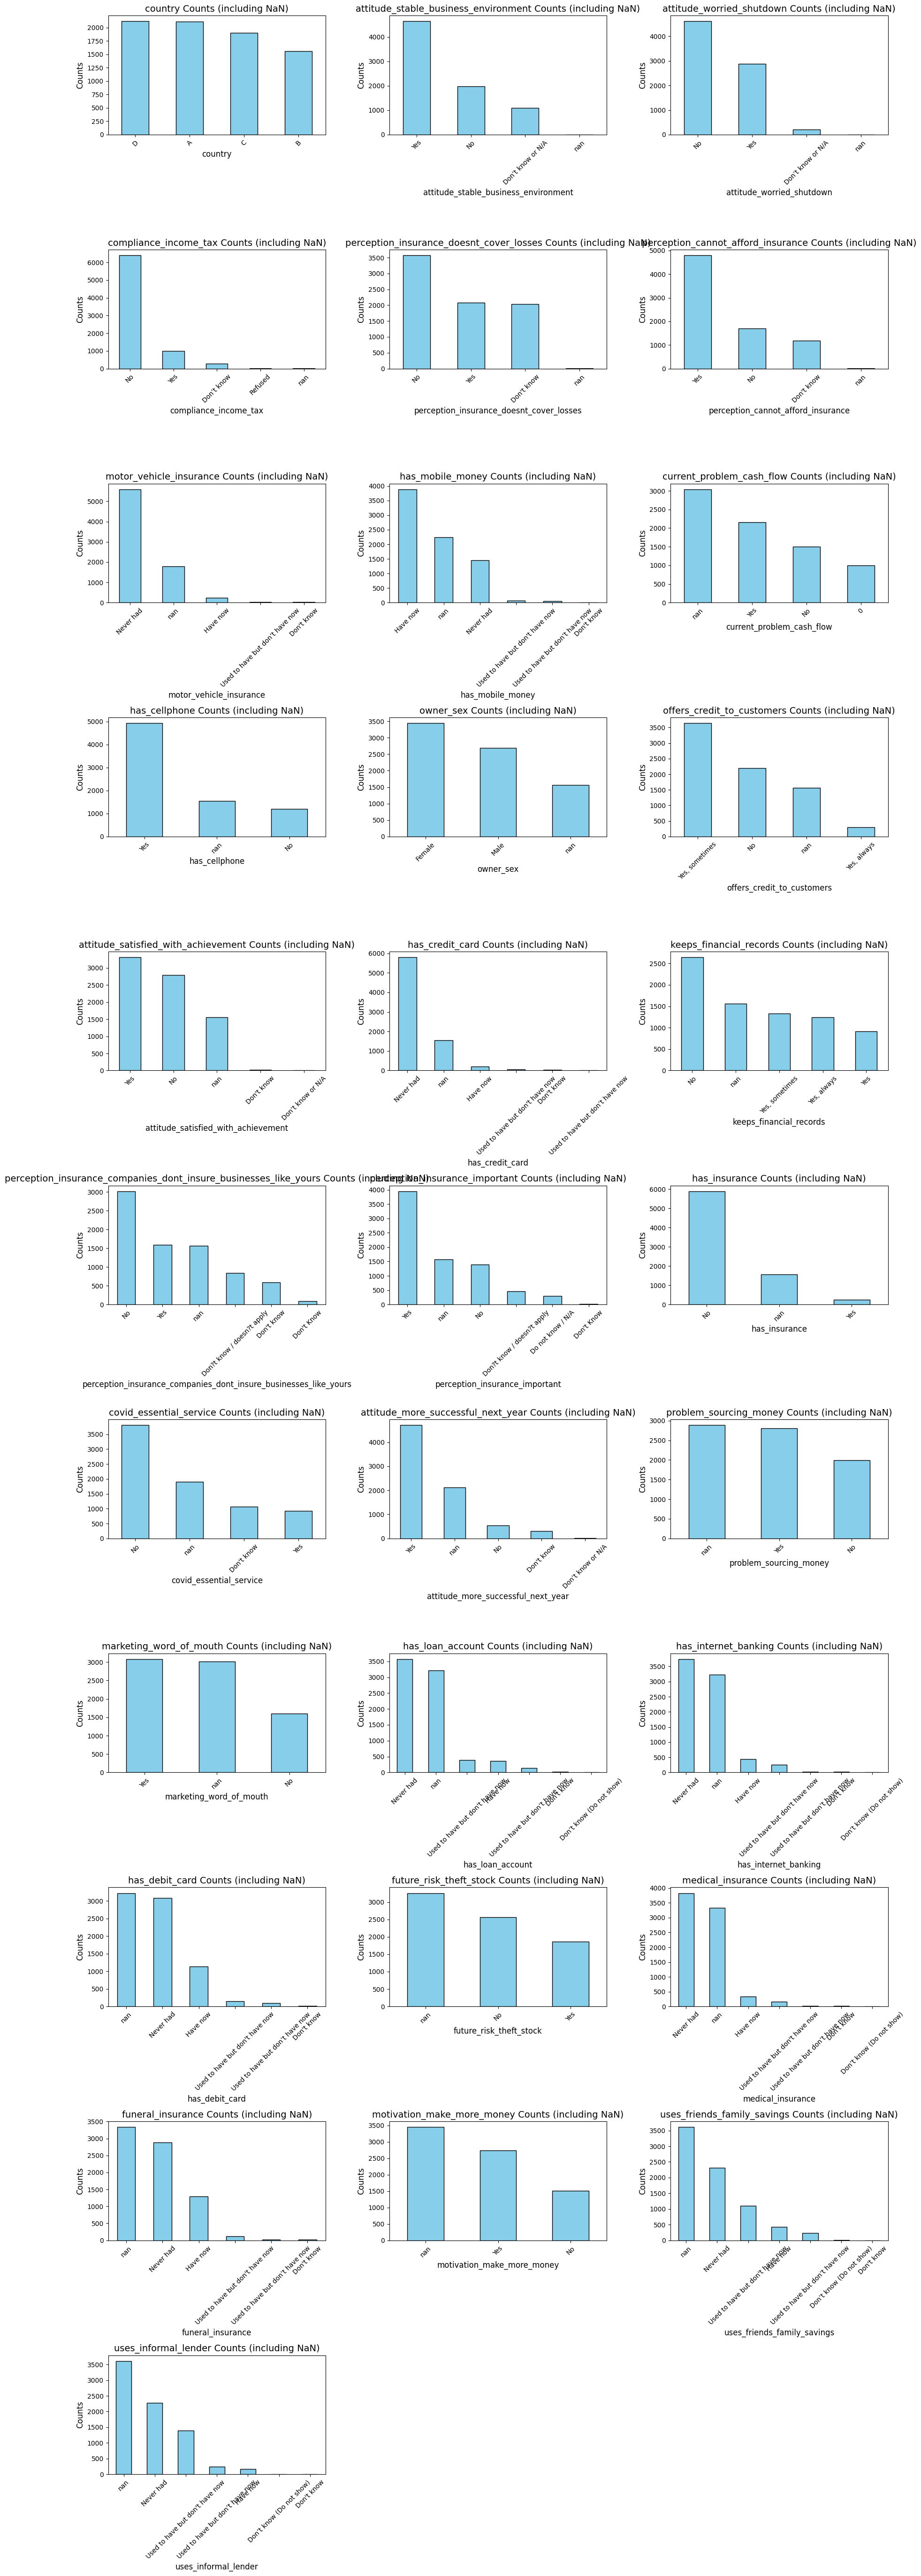

In [ ]:
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()  # Flatten in case we have multiple rows

for i, col in enumerate(cat_cols):
    X_train[col].value_counts(dropna=False).plot(
        kind='bar', 
        ax=axes[i], 
        color='skyblue', 
        edgecolor='black'
    )
    axes[i].set_title(f'{col} Counts (including NaN)', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Counts', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
X_train['attitude_worried_shutdown']

fill missing values

In [75]:
# X_train_cat_miss_fill = X_train.copy()
# X_test_cat_miss_fill = X_test.copy()
# X_train_cat_miss_fill[cat_cols] = X_train[cat_cols].fillna('Unknown')
# X_test_cat_miss_fill[cat_cols] = X_test[cat_cols].fillna('Unknown')

In [14]:
X_train[cat_cols] = X_train[cat_cols].fillna('Unknown')
X_test[cat_cols] = X_test[cat_cols].fillna('Unknown')

#### Encoding Categorical Variables

for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).


In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iterations).

#### Label Encoding and One-Hot Encoding

In [15]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in X_train:
    if X_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(X_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(X_train[col])
            # Transform both training and testing data
            X_train[col] = le.transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


<mark>note that there is some variables contain only 2 classes but because missing vals "nan" it counts as 3 </mark>

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on train and transform train
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transform test
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert to DataFrame with proper column names
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Combine with numeric features
numeric_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
X_train_encoded = pd.concat([X_train[numeric_features], X_train_encoded_df], axis=1)
X_test_encoded = pd.concat([X_test[numeric_features], X_test_encoded_df], axis=1)

print("X_train shape:", X_train_encoded.shape)
print("X_test shape:", X_test_encoded.shape)


X_train shape: (7694, 145)
X_test shape: (1924, 145)


##### Fix Column names

In [17]:
import re
# Clean column names (in case not done yet)
def clean_column_names(df):
    df.columns = [re.sub(r'[^A-Za-z0-9_]+', '_', col) for col in df.columns]
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols == dup] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train_encoded = clean_column_names(X_train_encoded.copy())
X_test_encoded = clean_column_names(X_test_encoded.copy())

In [19]:
X_train_encoded.columns

Index(['owner_age', 'personal_income', 'business_expenses',
       'business_turnover', 'business_age_years', 'business_age_months',
       'country_A', 'country_B', 'country_C', 'country_D',
       ...
       'uses_friends_family_savings_Have_now',
       'uses_friends_family_savings_Never_had',
       'uses_friends_family_savings_Used_to_have_but_don_t_have_now',
       'uses_friends_family_savings_nan', 'uses_informal_lender_Don_t_know',
       'uses_informal_lender_Don_t_know_Do_not_show_',
       'uses_informal_lender_Have_now', 'uses_informal_lender_Never_had',
       'uses_informal_lender_Used_to_have_but_don_t_have_now',
       'uses_informal_lender_nan'],
      dtype='object', length=145)

#### Back to Exploratory Data Analysis

##### Anomalies

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method.

#### Correlations

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. 

In [15]:
# Map Target to numeric
y_train_numeric = y_train.map({'Low': 0, 'Medium': 1, 'High': 2})

# Compute correlations
correlations = X_train_encoded.corrwith(y_train_numeric).sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations:
 uses_friends_family_savings_Have_now    0.164361
has_debit_card_Have_now                 0.166807
marketing_word_of_mouth_Yes             0.166919
has_internet_banking_Have_now           0.177470
motivation_make_more_money_nan          0.182778
future_risk_theft_stock_nan             0.208703
country_A                               0.225310
compliance_income_tax_Yes               0.228918
keeps_financial_records_Yes_always      0.239107
motor_vehicle_insurance_Have_now        0.268308
has_insurance_Yes                       0.294409
has_loan_account_Have_now               0.299841
medical_insurance_Have_now              0.309624
has_credit_card_Have_now                0.333878
funeral_insurance_Have_now              0.621168
dtype: float64

Most Negative Correlations:
 funeral_insurance_Never_had                                                                 -0.272043
motor_vehicle_insurance_nan                                                              

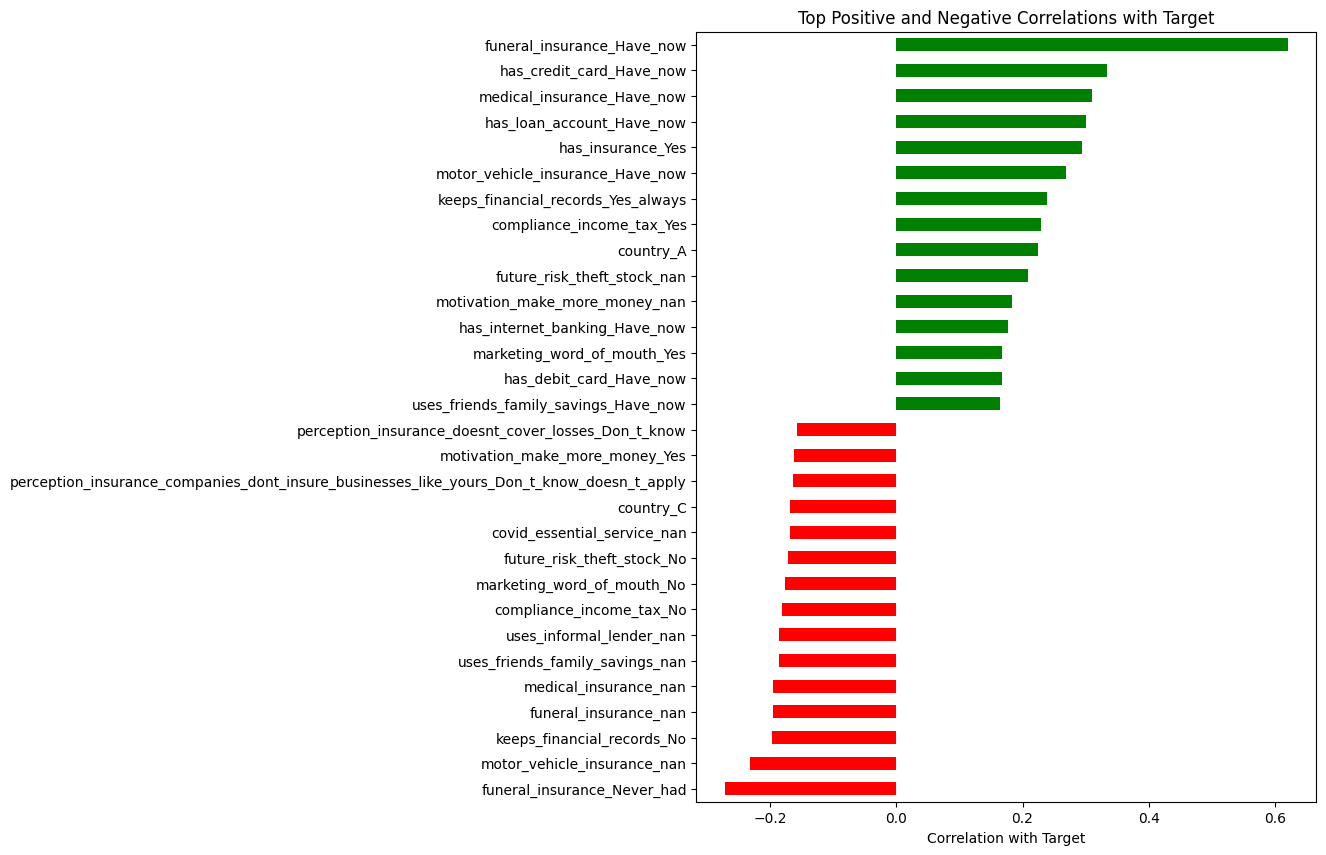

In [16]:
import matplotlib.pyplot as plt

# Most positive correlations
top_pos = correlations.tail(15)

# Most negative correlations
top_neg = correlations.head(15)

# Combine
top_corr = pd.concat([top_neg, top_pos])

# Plot
plt.figure(figsize=(8,10))
top_corr.plot(kind='barh', color=['red' if x<0 else 'green' for x in top_corr])
plt.xlabel('Correlation with Target')
plt.title('Top Positive and Negative Correlations with Target')
plt.show()


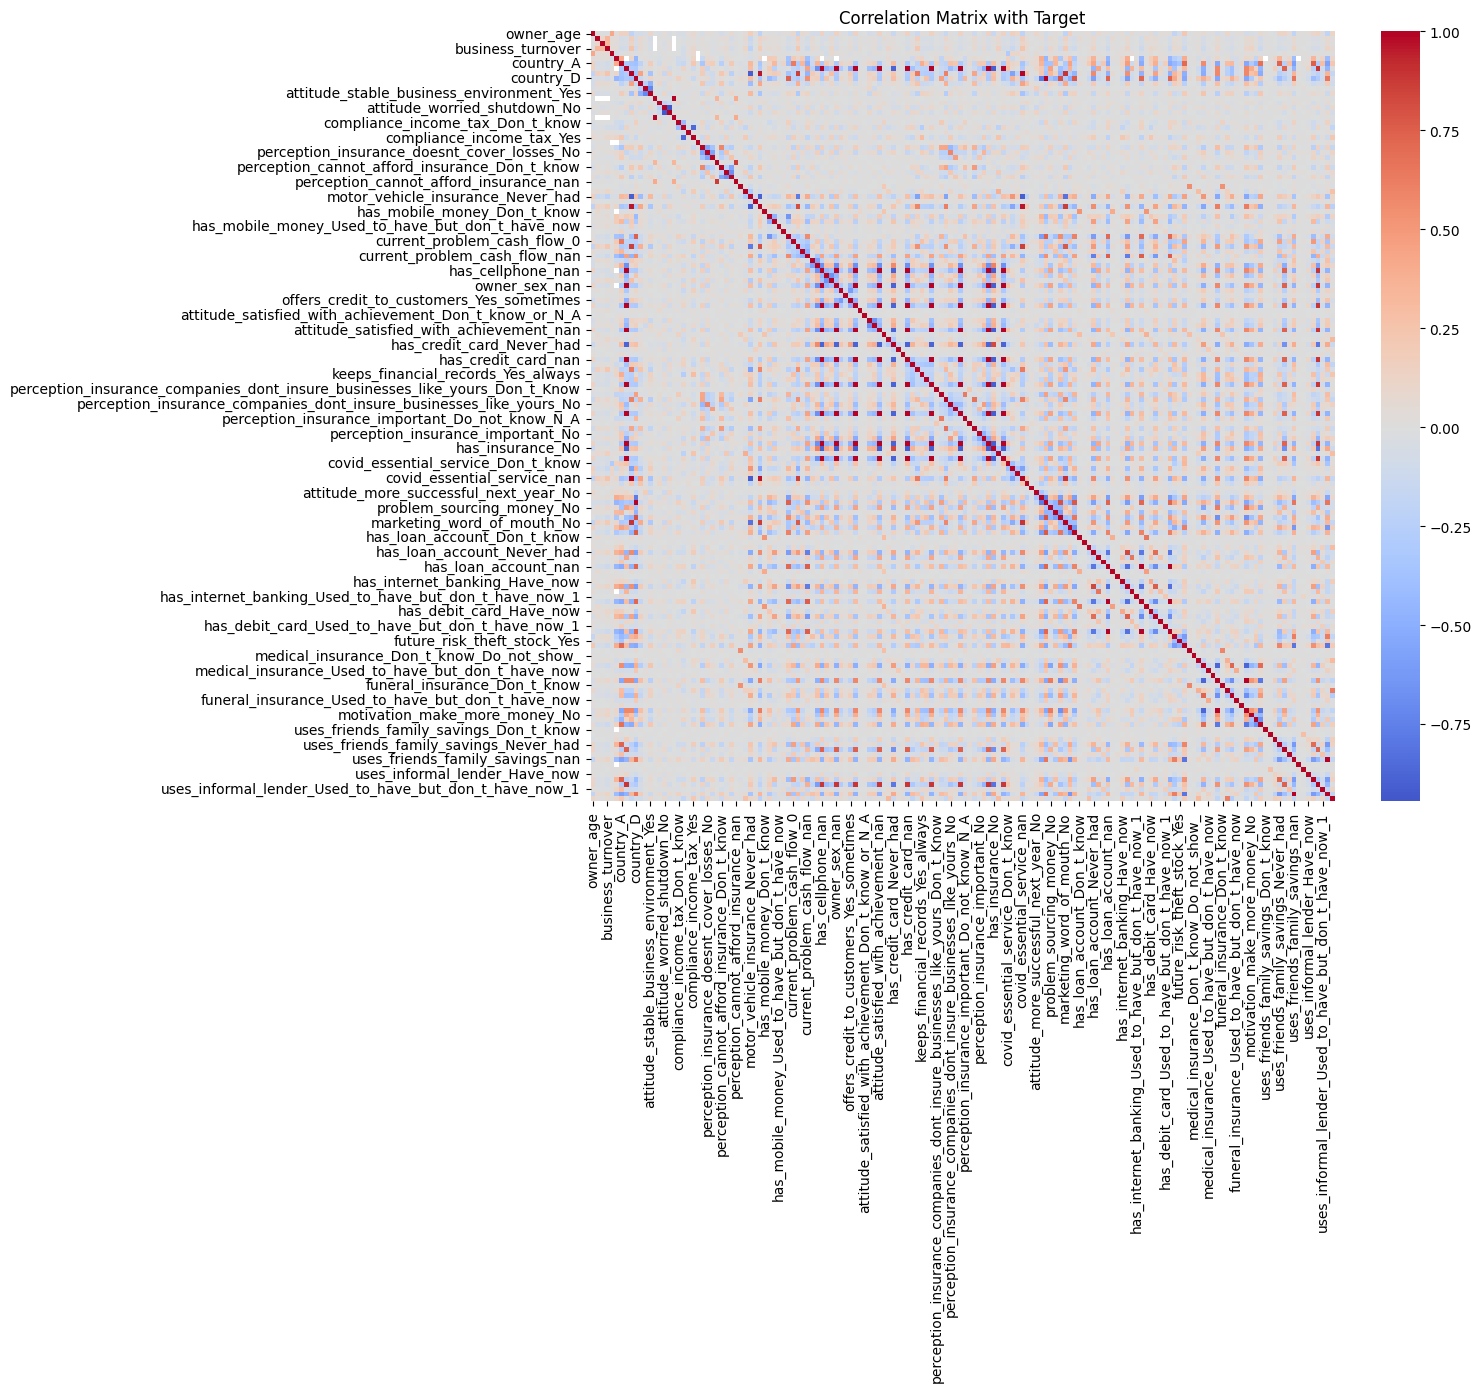

In [17]:
import seaborn as sns

# Combine X_train_encoded and target numeric
train_corr = X_train_encoded.copy()
train_corr['Target'] = y_train_numeric

plt.figure(figsize=(12,10))
sns.heatmap(train_corr.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix with Target')
plt.show()


Let's take a look at some of more significant correlations: the `funeral_insurance_Have_now` is the most positive correlation.


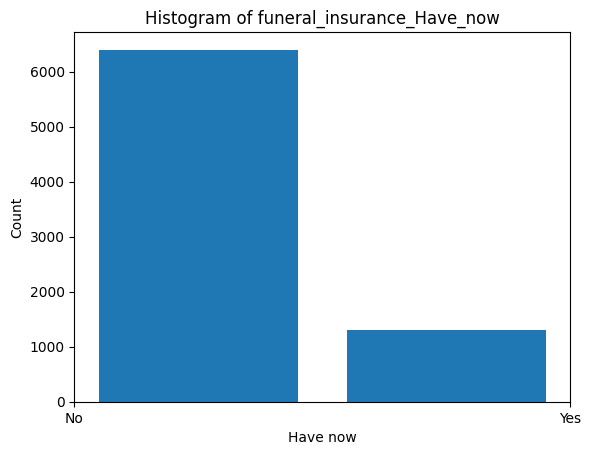

In [18]:
import matplotlib.pyplot as plt

plt.hist(X_train_encoded['funeral_insurance_Have_now'], bins=2, rwidth=0.8)
plt.xlabel('Have now')
plt.ylabel('Count')
plt.title('Histogram of funeral_insurance_Have_now')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


#### Owner Age

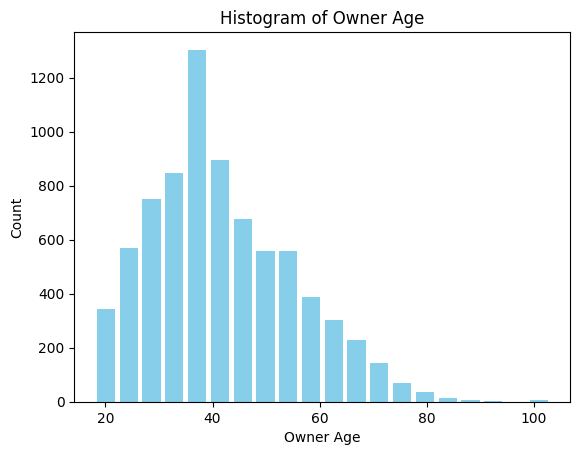

In [19]:
import matplotlib.pyplot as plt

plt.hist(X_train['owner_age'], bins=20, rwidth=0.8, color='skyblue')
plt.xlabel('Owner Age')
plt.ylabel('Count')
plt.title('Histogram of Owner Age')
plt.show()


<mark>Outlier Detected</mark>

To visualize the effect of the owner_age on the target, we will next make a <mark>kernel density estimation plot (KDE)</mark> colored by the value of the target.A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). 

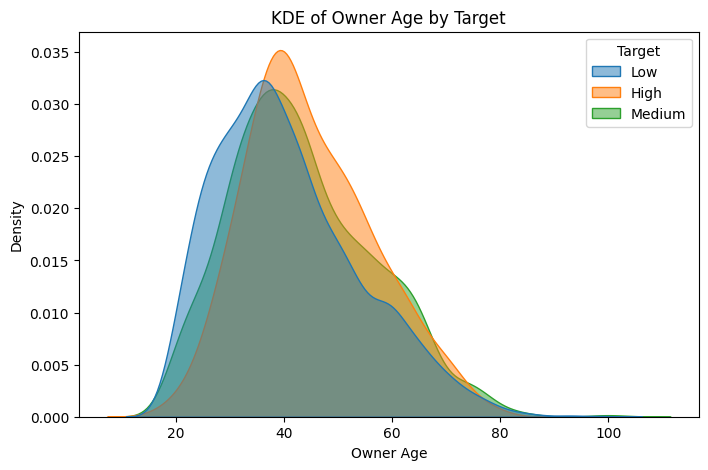

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train and y_train into one DataFrame
train_plot = X_train.copy()
train_plot['Target'] = y_train  # keep as categorical

# KDE plot
plt.figure(figsize=(8,5))
sns.kdeplot(data=train_plot, x='owner_age', hue='Target', fill=True, common_norm=False, alpha=0.5)
plt.title('KDE of Owner Age by Target')
plt.xlabel('Owner Age')
plt.ylabel('Density')
plt.show()


The `target == Low` curve skews towards the younger end of the range. Although this is not significant corr, this variable is likely going to be useful in ml model because it deos affect the target.

#### Country
`country_A` and `country_C` show strong positive and negative corr respectivally.

Correlation of country features with Target:
country_A    0.225310
country_B    0.002897
country_C   -0.168693
country_D   -0.064923
dtype: float64


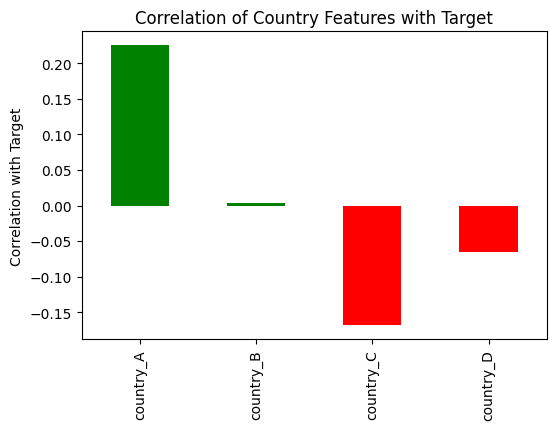

In [21]:
# Map Target to numeric
y_train_numeric = y_train.map({'Low': 0, 'Medium': 1, 'High': 2})

# Select country one-hot columns
country_cols = ['country_A', 'country_B', 'country_C', 'country_D']

# Compute correlations with target
country_corr = X_train_encoded[country_cols].corrwith(y_train_numeric)

print("Correlation of country features with Target:")
print(country_corr)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
country_corr.plot(kind='bar', color=['green' if x>0 else 'red' for x in country_corr])
plt.ylabel('Correlation with Target')
plt.title('Correlation of Country Features with Target')
plt.show()


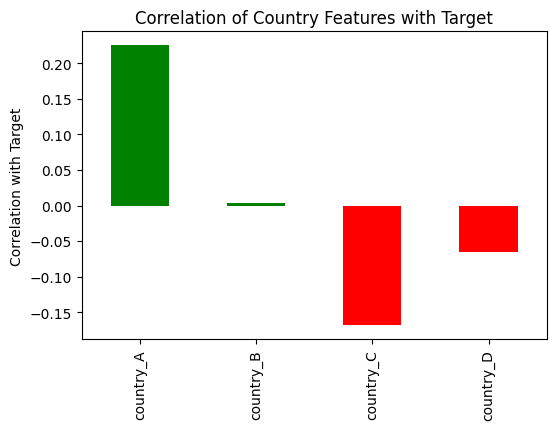

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
country_corr.plot(kind='bar', color=['green' if x>0 else 'red' for x in country_corr])
plt.ylabel('Correlation with Target')
plt.title('Correlation of Country Features with Target')
plt.show()


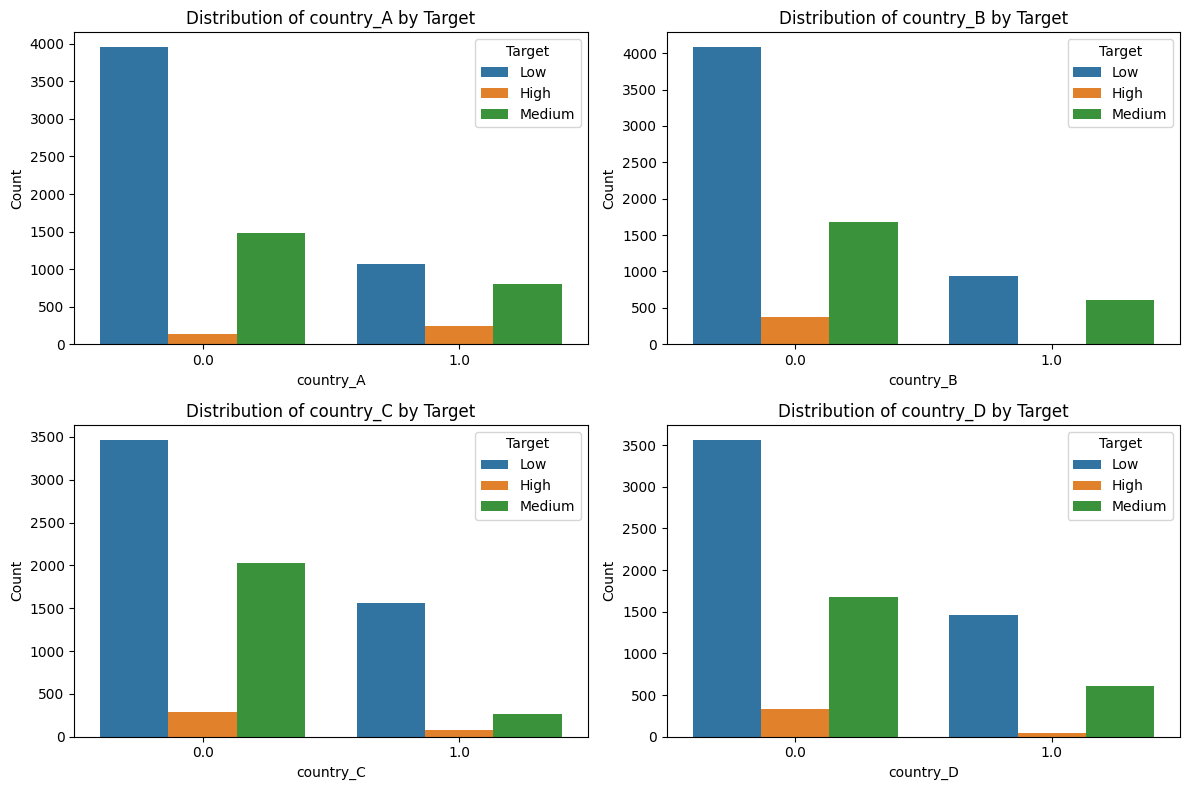

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train_encoded and y_train into one DataFrame
train_plot = X_train_encoded[country_cols].copy()
train_plot['Target'] = y_train  # keep as categorical

# Plot each country feature
plt.figure(figsize=(12,8))
for i, col in enumerate(country_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=train_plot, x=col, hue='Target')
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target')

plt.tight_layout()
plt.show()


`business_expenses`

# Save Data For Feature Engineering

In [20]:
X_train_encoded.to_csv('data/X_train.csv', index=False)
X_test_encoded.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)